### Importing libraries

In [ ]:
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from numpy import hstack


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from math import sqrt
from tensorflow import keras
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from pandas import read_csv
from datetime import datetime
from tensorflow.keras.layers import Bidirectional
import datetime
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from numpy import array
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
import pickle
from sklearn.metrics import r2_score
from sklearn.utils import shuffle


## Preprocessing and exploratory data analysis

### Summary statistics of boreholes

In [ ]:
BH_17_daily.describe()

,mAHD
count,2851.000000
mean,274.767377
std,1.475721
min,272.722304
25%,273.311896
50%,274.518240
75%,275.880017
max,278.749042


In [ ]:
BH_18_daily.describe()

,mAHD
count,3051.000000
mean,298.015381
std,1.933560
min,294.448563
25%,296.341125
50%,298.152615
75%,299.929349
max,301.147208


In [ ]:
BH_19_daily.describe()

,mAHD
count,2842.000000
mean,297.537990
std,1.762720
min,294.329771
25%,295.876562
50%,297.777760
75%,299.090495
max,300.194229


In [ ]:
BH_19_daily.describe()

,mAHD
count,2842.000000
mean,297.537990
std,1.762720
min,294.329771
25%,295.876562
50%,297.777760
75%,299.090495
max,300.194229


In [ ]:
m17_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,2243.000000,2243.000000,2243.000000,2243.000000
mean,0.010061,-0.000808,-0.417206,274.835023
std,0.039079,0.039079,0.787763,1.378493
min,0.000000,-0.010869,-2.519160,272.733583
25%,0.000000,-0.010869,-0.828945,273.698469
50%,0.000000,-0.010869,-0.261494,274.574886
75%,0.001389,-0.009480,0.152503,275.725882
max,0.823913,0.813044,0.949915,278.749042


In [ ]:
m18_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,2243.000000,2243.000000,2243.000000,2243.000000
mean,0.010061,-0.000808,-0.417206,298.110920
std,0.039079,0.039079,0.787763,1.854915
min,0.000000,-0.010869,-2.519160,294.448563
25%,0.000000,-0.010869,-0.828945,296.992510
50%,0.000000,-0.010869,-0.261494,298.218229
75%,0.001389,-0.009480,0.152503,299.866536
max,0.823913,0.813044,0.949915,301.147208


In [ ]:
m19_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,2243.000000,2243.000000,2243.000000,2243.000000
mean,0.010061,-0.000808,-0.417206,297.735485
std,0.039079,0.039079,0.787763,1.649926
min,0.000000,-0.010869,-2.519160,294.329771
25%,0.000000,-0.010869,-0.828945,296.739312
50%,0.000000,-0.010869,-0.261494,298.008813
75%,0.001389,-0.009480,0.152503,299.041062
max,0.823913,0.813044,0.949915,300.194229


In [ ]:
m20_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,1706.000000,1706.000000,1706.000000,1706.000000
mean,0.010616,-0.000253,-0.058880,318.360053
std,0.039715,0.039715,0.454953,0.383531
min,0.000000,-0.010869,-1.093332,317.160156
25%,0.000000,-0.010869,-0.402715,318.259065
50%,0.000000,-0.010869,-0.075162,318.259065
75%,0.001389,-0.009480,0.273715,318.259065
max,0.823913,0.813044,0.949915,319.628802


In [ ]:
m21_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,2376.000000,2.376000e+03,2376.000000,2376.000000
mean,0.010869,7.476249e-19,-0.459062,314.828965
std,0.041136,4.113607e-02,0.793743,1.875043
min,0.000000,-1.086905e-02,-2.519160,312.895062
25%,0.000000,-1.086905e-02,-0.981064,313.083000
50%,0.000000,-1.086905e-02,-0.326526,314.251473
75%,0.001389,-9.480157e-03,0.125146,316.054718
max,0.823913,8.130440e-01,0.949915,319.393907


In [ ]:
m22_daily.describe()

,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,0.011861,0.000992,-0.404297,305.134115
std,0.046122,0.046122,0.452256,0.948955
min,0.000000,-0.010869,-2.013252,304.502334
25%,0.000000,-0.010869,-0.665505,304.516882
50%,0.000000,-0.010869,-0.346379,304.669581
75%,0.001389,-0.009480,-0.062766,305.194948
max,0.823913,0.813044,0.351261,307.811937


### Windowing and time-lag analysis

In [ ]:
m17_daily

,Date and Time,Rainfall,Rainfall departure,Cumulative rainfall departure,mAHD
0,2013-07-29,0.0,-0.010869,-0.010869,275.836038
1,2013-07-30,0.0,-0.010869,-0.021738,275.829895
2,2013-07-31,0.0,-0.010869,-0.032607,275.823753
3,2013-08-01,0.0,-0.010869,-0.043476,275.817610
4,2013-08-02,0.0,-0.010869,-0.054345,275.811468
...,...,...,...,...,...
2238,2020-11-07,0.0,-0.010869,-1.767915,275.932896
2239,2020-11-08,0.0,-0.010869,-1.778784,275.913479
2240,2020-11-09,0.0,-0.010869,-1.789653,275.895375
2241,2020-11-10,0.0,-0.010869,-1.800522,275.878083


In [ ]:
m19_daily

,Date and Time,mAHD_x,mAHD_y,discretised_flow
0,2013-08-01,300.177664,299.757948,0
1,2013-08-02,300.173297,299.767222,0
2,2013-08-03,300.170282,299.776497,0
3,2013-08-04,300.171953,299.785771,0
4,2013-08-05,300.173122,299.795046,0
...,...,...,...,...
2655,2020-11-07,300.205798,298.959875,0
2656,2020-11-08,300.206215,298.958896,0
2657,2020-11-09,300.206185,298.980333,0
2658,2020-11-10,300.206025,299.012354,0


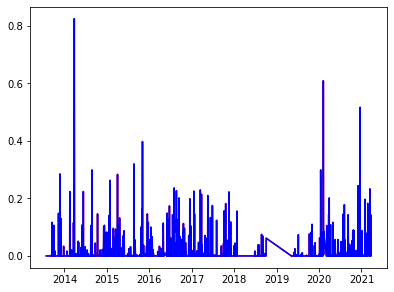

In [ ]:
plt.plot(m19_daily['Date and Time'], m19_daily['Rainfall'], color='red' )
plt.plot(weather_data_daily['Date and Time'], weather_data_daily['Rainfall'], color='blue' )
#plt.plot(m19_daily['Date and Time'], m19_daily['mAHD'] )
#plt.plot(m19_daily['Date and Time'], m19_daily['mAHD'] )
plt.show()

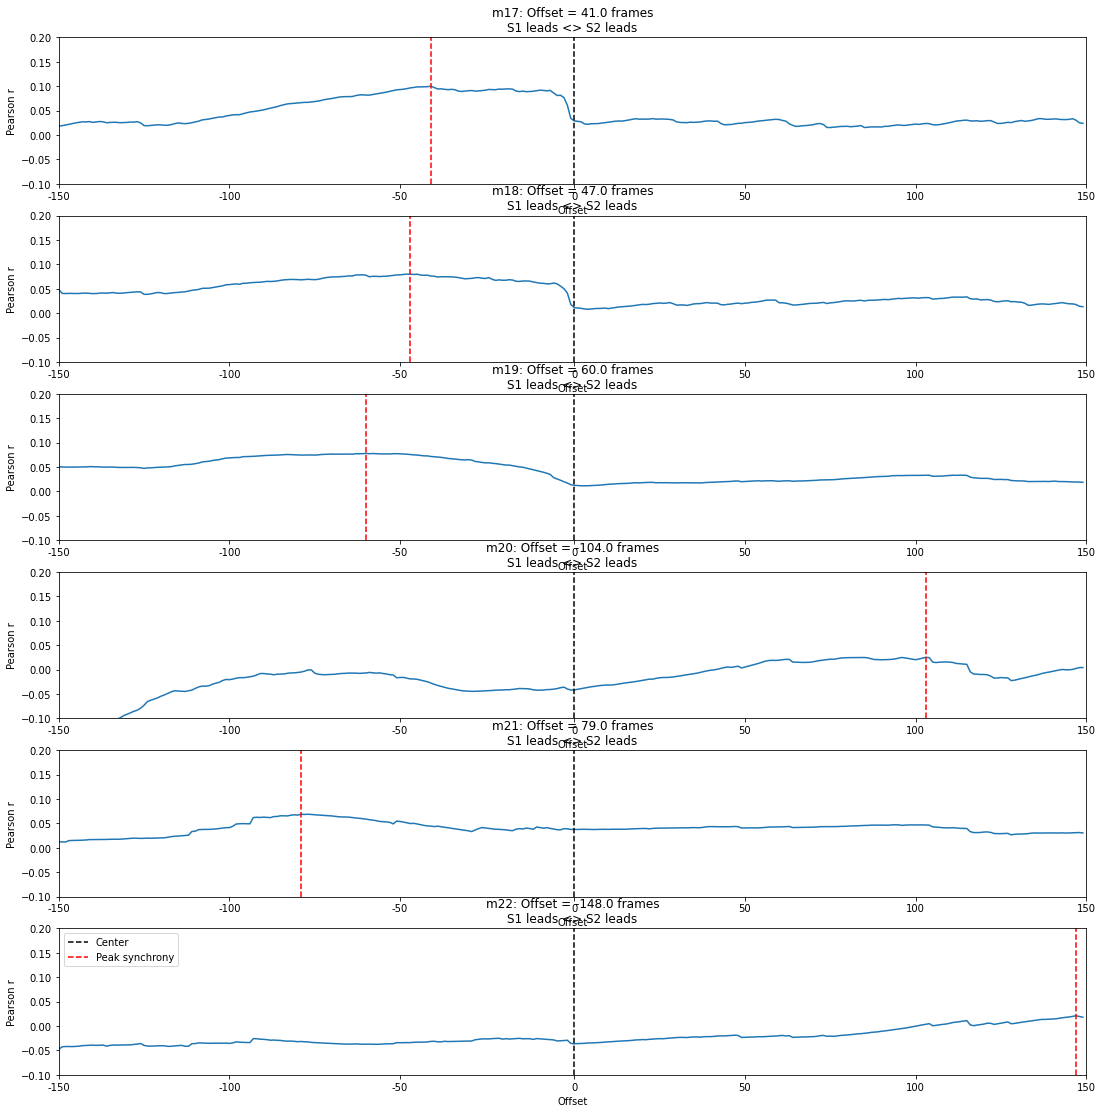

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation.
    Shifted data filled with NaNs

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))
f,ax =plt.subplots(6,1)
f.tight_layout()
for i in range(len(models_daily)):
  d1 = models_daily[i]['Rainfall']
  d2 = models_daily[i]['mAHD']
  seconds = 5
  fps = 30
  rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
  offset = np.floor(len(rs)/2)-np.argmax(rs)

  ax[i].plot(rs)
  ax[i].axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
  ax[i].axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
  ax[i].set(title=f'm{17+i}: Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-0.1,0.2],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
  ax[i].set_xticks([0, 50, 100, 151, 201, 251, 301])
  ax[i].set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
  plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]




In [ ]:
plt.rcParams["figure.figsize"] = (15,15)

f,ax =plt.subplots(6,1)
f.tight_layout()
for i in range(len(models)):
  d1 = models[i]['Rainfall']
  d2 = models[i]['mAHD']
  seconds = 5
  fps = 30
  rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
  offset = np.floor(len(rs)/2)-np.argmax(rs)

  ax[i].plot(rs)
  ax[i].axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
  ax[i].axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
  ax[i].set(title=f'm{17+i}: Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-0.1,0.2],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
  ax[i].set_xticks([0, 50, 100, 151, 201, 251, 301])
  ax[i].set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
  plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


In [ ]:
f,ax =plt.subplots(1,1)

d1 = stream['Rainfall']
d2 = stream['streamflow_mAHD']
seconds=5
fps=150
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'streamflow: Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-0.1,0.2],xlim=[0,int(seconds*fps)*2+1], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks(range(0,int(seconds*fps)*2,150))
ax.set_xticklabels(range(-int(seconds*fps),int(seconds*fps)+150,150));
plt.legend()
# Roughly a half a day (although merging makes things strange)

In [ ]:
f,ax =plt.subplots(1,1)

d1 = stream_hourly['Rainfall']
d2 = stream_hourly['streamflow_mAHD']
seconds=5
fps=150
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'streamflow: Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-0.1,0.2],xlim=[0,int(seconds*fps)*2+1], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks(range(0,int(seconds*fps)*2,150))
ax.set_xticklabels(range(-int(seconds*fps),int(seconds*fps)+150,150));
plt.legend()
# Roughly a half a day (although merging makes things strange)

In [ ]:
f,ax =plt.subplots(1,1)

d1 = stream_daily['Rainfall']
d2 = stream_daily['streamflow_mAHD']
seconds=5
fps=150
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)

ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'streamflow: Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-0.1,0.2],xlim=[0,int(seconds*fps)*2+1], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks(range(0,int(seconds*fps)*2,150))
ax.set_xticklabels(range(-int(seconds*fps),int(seconds*fps)+150,150));
plt.legend()
# Roughly a day (makes sense)

In [ ]:
import torch
from torch.autograd import Variable
with torch.enable_grad():
  class linearRegression(torch.nn.Module):
      def __init__(self, inputSize, outputSize):
          super(linearRegression, self).__init__()
          self.linear = torch.nn.Linear(inputSize, outputSize)

      def forward(self, x):
          out = self.linear(x)
          return out


  def find_optimal_window(x_dataset, y_dataset, input_delay, max_window_size=100):
    res = {}
    for window_size in range(1,max_window_size):
      #lowest_loss = 10000000
      x_data = series_to_supervised(list(x_dataset), n_in=0, n_out=window_size).iloc[:-input_delay].to_numpy(float)
      y_data =  np.ediff1d(y_dataset[input_delay -2 + window_size:].to_numpy())
      x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

      inputDim = window_size       # takes variable 'x'
      outputDim = 1       # takes variable 'y'
      learningRate = 0.01
      epochs = 1000

      model = linearRegression(inputDim, outputDim)
      ##### For GPU #######
      if torch.cuda.is_available():
          model.cuda()

      criterion = torch.nn.MSELoss()
      optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

      for epoch in range(epochs):
          # Converting inputs and labels to Variable
          if torch.cuda.is_available():
              inputs = Variable(torch.from_numpy(x_train).cuda()).float()
              labels = Variable(torch.from_numpy(y_train).cuda()).float()
          else:
              inputs = Variable(torch.from_numpy(x_train)).float()
              labels = Variable(torch.from_numpy(y_train).view(len(y_train), 1)).float()

          # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
          optimizer.zero_grad()

          # get output from the model, given the inputs
          outputs = model(inputs)

          # get loss for the predicted output
          loss = criterion(outputs, labels)

          # get gradients w.r.t to parameters
          loss.backward()

          # update parameters
          optimizer.step()
      y_pred = model(Variable(torch.from_numpy(x_test)).float())
      res[window_size] = criterion(y_pred, Variable(torch.from_numpy(y_test).view(len(y_test), 1)).float()).detach().numpy()
    return res




In [ ]:
rainfall_lag_windows = find_optimal_window(stream['Rainfall'], stream['streamflow_mAHD'], 37, 40)
rainfall_lag_windows_daily = find_optimal_window(stream_daily['Rainfall'], stream_daily['streamflow_mAHD'], 1, 40)
rainfall_lag_windows_hourly = find_optimal_window(stream_hourly['Rainfall'], stream_hourly['streamflow_mAHD'], 20, 40)


In [ ]:
plt.plot(list(rainfall_lag_windows_daily.keys()),  list(rainfall_lag_windows_daily.values()))

In [ ]:
plt.plot(list(rainfall_lag_windows.keys()),  list(rainfall_lag_windows.values()))

In [ ]:
plt.plot(list(rainfall_lag_windows_hourly.keys()),  list(rainfall_lag_windows_hourly.values()))

## Fine predictions for streamflow

In [ ]:
lag = 37
window_length = 15
x_data = series_to_supervised(list(stream['Rainfall']), n_in=0, n_out=window_length).iloc[:-lag].to_numpy(float)
y_data = np.ediff1d(stream['streamflow_mAHD'][lag - 1+window_length-1:].to_numpy())
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

inputDim = window_length       # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 1000

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda()).float()
        labels = Variable(torch.from_numpy(y_train).cuda()).float()
    else:
        inputs = Variable(torch.from_numpy(x_train)).float()
        labels = Variable(torch.from_numpy(y_train).view(len(y_train), 1)).float()

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

predicted = model(Variable(torch.from_numpy(x_data)).float()).data.numpy()
loc, _ = np.where(streamflow.isna())
for i in loc:
  start_time = streamflow['Date and Time'][i] - datetime.timedelta(hours=26)
  end_time = streamflow['Date and Time'][i] - datetime.timedelta(hours=18, minutes=30)
  mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
  entries = weather_data.loc[mask][-window_length:]
  x_values = np.pad(entries['Rainfall'], (0, window_length-len(entries['Rainfall'])))
  output = model(Variable(torch.from_numpy(x_values)).float()).data.item()
  streamflow['mAHD'][i] = streamflow['mAHD'][i-1] + output


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


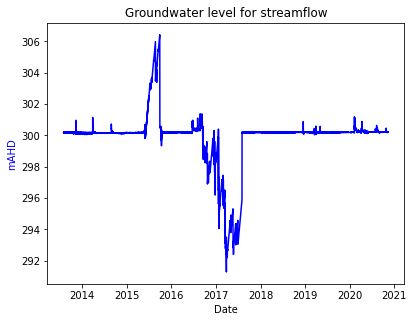

In [ ]:
fig,ax = plt.subplots()
ax.plot(streamflow['Date and Time'], streamflow['mAHD'], color="blue" )
ax.set_xlabel('Date')
ax.set_ylabel('mAHD', color='blue')
ax.set_title('Groundwater level for streamflow')
plt.show()

## Hourly predictions for streamflow

In [ ]:
lag = 20
window_length = 9
x_data = series_to_supervised(list(stream_hourly['Rainfall']), n_in=0, n_out=window_length).iloc[:-lag].to_numpy(float)
y_data = np.ediff1d(stream_hourly['streamflow_mAHD'][lag - 1+window_length-1:].to_numpy())
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

inputDim = window_length       # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 1000

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda()).float()
        labels = Variable(torch.from_numpy(y_train).cuda()).float()
    else:
        inputs = Variable(torch.from_numpy(x_train)).float()
        labels = Variable(torch.from_numpy(y_train).view(len(y_train), 1)).float()

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

predicted = model(Variable(torch.from_numpy(x_data)).float()).data.numpy()


In [ ]:
loc, _ = np.where(streamflow_hourly.isna())

In [ ]:
for i in loc:
  #start_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=26)
  #end_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=18, minutes=30)
  start_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=29)
  end_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=20)
  mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
  entries = weather_data.loc[mask][-window_length:]
  x_values = np.pad(entries['Rainfall'], (0, window_length-len(entries['Rainfall'])))
  output = model(Variable(torch.from_numpy(x_values)).float()).data.item()
  streamflow_hourly['mAHD'][i] = streamflow_hourly['mAHD'][i-1] + output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# streamflow_new = np.zeros(len(streamflow))
# for i in range(len(streamflow)):
#   if (i in loc):
#     start_time = streamflow['Date and Time'][i] - datetime.timedelta(hours=26)
#     end_time = streamflow['Date and Time'][i] - datetime.timedelta(hours=18, minutes=30)
#     mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
#     entries = weather_data.loc[mask][-15:]
#     x_values = np.pad(entries['Rainfall'], (0, 15-len(entries['Rainfall'])))
#     output = model(Variable(torch.from_numpy(x_values)).float()).data.item()
#     streamflow_new['mAHD'][i] = streamflow['mAHD'][i-1] + output
#   else:
#     print(i)
#     streamflow_new['mAHD'][i] = streamflow['mAHD'][i]


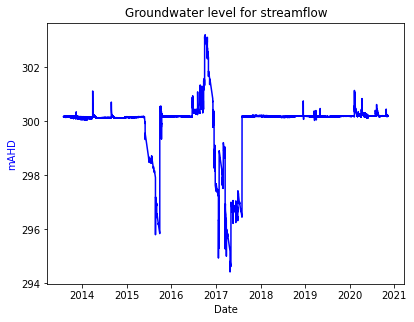

In [ ]:
fig,ax = plt.subplots()
ax.plot(streamflow_hourly['Date and Time'], streamflow_hourly['mAHD'], color="blue" )
ax.set_xlabel('Date')
ax.set_ylabel('mAHD', color='blue')
ax.set_title('Groundwater level for streamflow')
plt.show()

In [ ]:
fields = ['Stilling Well', 'mAHD']

streamflow = pd.read_csv('drive/MyDrive/Thesis/Thesis/Middle Creek surface.csv', skipinitialspace=True, usecols=fields)
streamflow = streamflow.rename(columns={'Stilling Well': 'Date and Time'})
streamflow['Date and Time'] = pd.to_datetime(streamflow['Date and Time'], dayfirst=True,errors='coerce')
streamflow_hourly = streamflow['mAHD'].groupby(streamflow['Date and Time'].dt.to_period('H')).mean().to_frame().reset_index()
streamflow_hourly['Date and Time'] = streamflow_hourly['Date and Time'].dt.to_timestamp()
streamflow_hourly['mAHD'] = streamflow_hourly['mAHD'].dropna(axis=0)

In [ ]:
import random
import math
from math import exp

class lin_model:

	def __init__(self, num_epocs, train_data, test_data, num_features, learn_rate, activation):
		self.train_data = train_data
		self.test_data = test_data
		self.num_features = num_features
		self.num_outputs = self.train_data.shape[1] - num_features
		self.num_train = self.train_data.shape[0]
		self.w = np.random.uniform(0, 0.5, num_features)  # in case one output class
		self.b = np.random.uniform(0, 0.5, self.num_outputs)
		self.learn_rate = learn_rate
		self.max_epoch = num_epocs
		self.use_activation = activation #SIGMOID # 1 is  sigmoid , 2 is step, 3 is linear
		self.out_delta = np.zeros(self.num_outputs)
		self.activation = activation

	def activation_func(self,z_vec):
		if self.use_activation == False:
			y =  1 / (1 + np.exp(z_vec)) # sigmoid/logistic
		else:
			y = z_vec
		return y


	def predict(self, x_vec ):
		z_vec = x_vec.dot(self.w) - self.b
		output = self.activation_func(z_vec) # Output
		return output



	def squared_error(self, prediction, actual):
		return  np.sum(np.square(prediction - actual))/prediction.shape[0]# to cater more in one output/class

	def encode(self, w): # get  the parameters and encode into the model

		self.w =  w[0:self.num_features]
		self.b = w[self.num_features]

	def evaluate_proposal(self, data, w):  # BP with SGD (Stocastic BP)

		self.encode(w)  # method to encode w and b
		fx = np.zeros(data.shape[0])

		for s in range(0, data.shape[0]):
				i = s #random.randint(0, data.shape[0]-1)  (we dont shuffle in this implementation)
				input_instance  =  data[i,0:self.num_features]
				actual  = data[i,self.num_features:]
				prediction = self.predict(input_instance)
				fx[s] = prediction

		return fx

	'''def gradient(self, x_vec, output, actual):  # not used in case of Random Walk proposals in MCMC
		if self.use_activation == SIGMOID :
			out_delta =   (output - actual)*(output*(1-output))
		else: # for linear and step function
			out_delta =   (output - actual)
		return out_delta

	def update(self, x_vec, output, actual):      # not used by MCMC alg
		self.w+= self.learn_rate *( x_vec *  self.out_delta)
		self.b+=  (1 * self.learn_rate * self.out_delta)'''



#------------------------------------------------------------------


class MCMC:
	def __init__(self, samples, traindata, testdata, topology, regression):
		self.samples = samples  # NN topology [input, hidden, output]
		self.topology = topology  # max epocs
		self.traindata = traindata  #
		self.testdata = testdata
		random.seed()
		self.regression = regression # False means classification


	def rmse(self, predictions, targets):
		return np.sqrt(((predictions - targets) ** 2).mean())


	def likelihood_func(self, model, data, w, tausq):

		y = data[:, self.topology[0]]
		fx = model.evaluate_proposal(data, w)
		accuracy = self.rmse(fx, y) #RMSE
		loss = -0.5 * np.log(2 * math.pi * tausq) - 0.5 * np.square(y - fx) / tausq
		return [np.sum(loss), fx, accuracy]




	def prior_likelihood(self, sigma_squared, nu_1, nu_2, w, tausq):
		param = self.topology[0]  + 1 # number of parameters in model
		part1 = -1 * (param / 2) * np.log(sigma_squared)
		part2 = 1 / (2 * sigma_squared) * (sum(np.square(w)))
		log_loss = part1 - part2 - (1 + nu_1) * np.log(tausq) - (nu_2 / tausq)
		return log_loss

	def sampler(self):

		# ------------------- initialize MCMC
		testsize = self.testdata.shape[0]
		trainsize = self.traindata.shape[0]
		samples = self.samples

		x_test = np.linspace(0, 1, num=testsize)
		x_train = np.linspace(0, 1, num=trainsize)

		#self.topology  # [input,   output]
		y_test = self.testdata[:, self.topology[0]]
		y_train = self.traindata[:, self.topology[0]]

		w_size = self.topology[0]  + self.topology[1]  # num of weights and bias (eg. 4 + 1 in case of time series problems used)

		pos_w = np.ones((samples, w_size))  # posterior of all weights and bias over all samples
		pos_tau = np.ones((samples, 1))

		fxtrain_samples = np.ones((samples, trainsize))  # fx of train data over all samples
		fxtest_samples = np.ones((samples, testsize))  # fx of test data over all samples
		rmse_train = np.zeros(samples)
		rmse_test = np.zeros(samples)

		w = np.random.randn(w_size)
		w_proposal = np.random.randn(w_size)

		step_w = 0.02;  # defines how much variation you need in changes to w
		step_eta = 0.01;
		# eta is an additional parameter to cater for noise in predictions (Gaussian likelihood).
		# note eta is used as tau in the sampler to consider log scale.
		# eta is not used in multinomial likelihood.


		model = lin_model(0 ,  self.traindata, self.testdata, self.topology[0], 0.1, self.regression)

		pred_train = model.evaluate_proposal(self.traindata, w)
		pred_test = model.evaluate_proposal(self.testdata, w)

		eta = np.log(np.var(pred_train - y_train))
		tau_pro = np.exp(eta)

		print('evaluate Initial w')

		sigma_squared = 5  # considered by looking at distribution of  similar trained  models - i.e distribution of weights and bias
		nu_1 = 0
		nu_2 = 0

		prior_likelihood = self.prior_likelihood(sigma_squared, nu_1, nu_2, w, tau_pro)  # takes care of the gradients

		[likelihood, pred_train, rmsetrain] = self.likelihood_func(model, self.traindata, w, tau_pro)

		print(likelihood, ' initial likelihood')
		[likelihood_ignore, pred_test, rmsetest] = self.likelihood_func(model, self.testdata, w, tau_pro)


		naccept = 0

		for i in range(samples - 1):

			w_proposal = w + np.random.normal(0, step_w, w_size)

			eta_pro = eta + np.random.normal(0, step_eta, 1)
			tau_pro = math.exp(eta_pro)

			[likelihood_proposal, pred_train, rmsetrain] = self.likelihood_func(model, self.traindata, w_proposal, tau_pro)
			[likelihood_ignore, pred_test, rmsetest] = self.likelihood_func(model, self.testdata, w_proposal, tau_pro)

			# likelihood_ignore  refers to parameter that will not be used in the alg.

			prior_prop = self.prior_likelihood(sigma_squared, nu_1, nu_2, w_proposal, tau_pro)  # takes care of the gradients
			#print("likelihood proposal:", likelihood_proposal)
			#print("likelihood:", likelihood)
			diff_likelihood = likelihood_proposal - likelihood # since we using log scale: based on https://www.rapidtables.com/math/algebra/Logarithm.html
			diff_priorliklihood = prior_prop - prior_likelihood
			#print("diff likelihood and prior likelihood:", diff_likelihood + diff_priorliklihood)
			#print("diff likelihood:", diff_likelihood)
			#print("prior likelihood:", diff_priorliklihood)
			#print("exp diff likelihood and prior likelihood:", math.exp(diff_likelihood + diff_priorliklihood))
			if(diff_likelihood + diff_priorliklihood > 1):
				mh_prob = 1
			elif(diff_likelihood + diff_priorliklihood < -500):
				mh_prob = 0
			else:
				mh_prob = min(1, math.exp(diff_likelihood + diff_priorliklihood))


			u = random.uniform(0, 1)

			if u < mh_prob:
				# Update position
				#print    (i, ' is accepted sample')
				naccept += 1
				likelihood = likelihood_proposal
				prior_likelihood = prior_prop
				w = w_proposal
				eta = eta_pro
				rmse_train[i + 1,] = rmsetrain
				rmse_test[i + 1,] = rmsetest


				print (likelihood, prior_likelihood, rmsetrain, rmsetest, w, 'accepted')

				pos_w[i + 1,] = w_proposal
				pos_tau[i + 1,] = tau_pro
				fxtrain_samples[i + 1,] = pred_train
				fxtest_samples[i + 1,] = pred_test

			else:
				pos_w[i + 1,] = pos_w[i,]
				pos_tau[i + 1,] = pos_tau[i,]
				fxtrain_samples[i + 1,] = fxtrain_samples[i,]
				fxtest_samples[i + 1,] = fxtest_samples[i,]
				rmse_train[i + 1,] = rmse_train[i,]
				rmse_test[i + 1,] = rmse_test[i,]


		accept_ratio = naccept / (samples * 1.0) * 100


		print(accept_ratio, '% was accepted')

		burnin = 0.25 * samples  # use post burn in samples

		pos_w = pos_w[int(burnin):, ]
		pos_tau = pos_tau[int(burnin):, ]
		rmse_train = rmse_train[int(burnin):]
		rmse_test = rmse_test[int(burnin):]


		rmse_tr = np.mean(rmse_train)
		rmsetr_std = np.std(rmse_train)
		rmse_tes = np.mean(rmse_test)
		rmsetest_std = np.std(rmse_test)
		print(rmse_tr, rmsetr_std, rmse_tes, rmsetest_std, ' rmse_tr, rmsetr_std, rmse_tes, rmsetest_std')


		# let us next test the Bayesian model using the posterior distributions over n trials


		num_trials = 10

		accuracy = np.zeros(num_trials)

		for i in range(num_trials):
			#print(pos_w.mean(axis=0), pos_w.std(axis=0), ' pos w mean, pos w std')
			w_drawn = np.random.normal(pos_w.mean(axis=0), pos_w.std(axis=0), w_size)
			tausq_drawn = np.random.normal(pos_tau.mean(), pos_tau.std()) # a buf is present here - gives negative values at times

			[loss, fx_,  accuracy[i]] = self.likelihood_func(model, self.testdata, w_drawn, tausq_drawn)

			print(i, loss,  accuracy[i],  tausq_drawn , pos_tau.mean(), pos_tau.std(), ' posterior test ')

		print(accuracy.mean(), accuracy.std(), ' is mean and std of accuracy rmse test')



		return (pos_w, pos_tau, fxtrain_samples, fxtest_samples, rmse_train, rmse_test, accept_ratio)

In [ ]:
traindata = np.concatenate((x_train, y_train[:, None]), axis=1)
testdata = np.concatenate((x_test, y_test[:, None]), axis=1)
features = window_length
output = 1

activation = True
topology = [features, output]

MinCriteria = 0.005  # stop when RMSE reaches MinCriteria ( problem dependent)


numSamples = 2000 # need to decide yourself

mcmc = MCMC(numSamples, traindata, testdata, topology, activation)  # declare class

[pos_w, pos_tau, fx_train, fx_test,   rmse_train, rmse_test, accept_ratio] = mcmc.sampler()
print('sucessfully sampled')


fx_mu = fx_test.mean(axis=0)
fx_high = np.percentile(fx_test, 95, axis=0)
fx_low = np.percentile(fx_test, 5, axis=0)

fx_mu_tr = fx_train.mean(axis=0)
fx_high_tr = np.percentile(fx_train, 95, axis=0)
fx_low_tr = np.percentile(fx_train, 5, axis=0)


rmse_tr = np.mean(rmse_train)
rmsetr_std = np.std(rmse_train)
rmse_tes = np.mean(rmse_test)
rmsetest_std = np.std(rmse_test)

#np.savetxt(outres, (rmse_tr, rmsetr_std, rmse_tes, rmsetest_std, accept_ratio), fmt='%1.5f')



evaluate Initial w
-321462.0177279031  initial likelihood
-313495.5316604351 -6.024661134683717 1.1109078226145075 1.1092868519302577 [ 1.1745465   1.55772611 -1.4530408  -0.03157133  0.13498865  0.9989331
 -0.42846966  0.64944415  0.28985361  1.11229382] accepted
-309541.9962141469 -6.029940244497027 1.108239151624629 1.1065533769610445 [ 1.14883183  1.57125029 -1.44873018 -0.0550901   0.14308336  0.98552516
 -0.42081915  0.66609004  0.32139556  1.10967862] accepted
-296066.1900091378 -6.038008947588685 1.0865780072836202 1.0852167768037435 [ 1.16482915  1.59023976 -1.45155822 -0.04200074  0.1581739   0.97625467
 -0.38189036  0.68045053  0.35126554  1.08786821] accepted
-294798.1864496862 -6.0263880602546465 1.085837383841095 1.0847904677915239 [ 1.17038452  1.5875927  -1.42084363 -0.02932442  0.17192078  0.96436974
 -0.36643573  0.66939783  0.32971751  1.08766289] accepted
-293801.22782463627 -6.024884785779809 1.084162689822907 1.0829221175963888 [ 1.16975585  1.58418473 -1.43418428

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in log


6 21030.53140598623 0.02609397610921385 0.007741063635250251 0.012669822253093278 0.008041829181220326  posterior test 
7 21789.847636645747 0.03007200858409195 0.006633924160938476 0.012669822253093278 0.008041829181220326  posterior test 
8 17272.51693592718 0.042286765491262375 0.012358428806477252 0.012669822253093278 0.008041829181220326  posterior test 
9 16114.544554371501 0.05018831970615472 0.014028714717914116 0.012669822253093278 0.008041829181220326  posterior test 
0.04145811550329094 0.010480163625417822  is mean and std of accuracy rmse test
sucessfully sampled


[]

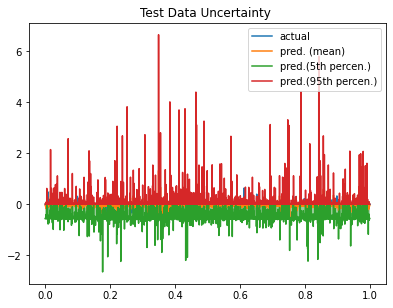

In [ ]:
ytestdata = testdata[:, features]
ytraindata = traindata[:, features]
x_test = np.linspace(0, 1, num=testdata.shape[0])
x_train = np.linspace(0, 1, num=traindata.shape[0])
plt.plot(x_test, ytestdata, label='actual')
plt.plot(x_test, fx_mu, label='pred. (mean)')
plt.plot(x_test, fx_low, label='pred.(5th percen.)')
plt.plot(x_test, fx_high, label='pred.(95th percen.)')
plt.fill_between(x_test, fx_low, fx_high, facecolor='g', alpha=0.4)
plt.legend(loc='upper right')

plt.title("Test Data Uncertainty ")
plt.plot()

In [ ]:
loc, _ = np.where(streamflow_hourly.isna())
loc

array([15876, 15877, 15878, ..., 35067, 35068, 35069])

In [ ]:
def predict_streamflow(w, data, num_features):
  weights = w[0:num_features]
  b = w[num_features]
  z_vec = data.dot(weights) - b
  output = z_vec # 1 / (1 + np.exp(z_vec)) #activation_func(z_vec)

  return output

In [ ]:
for i in loc:
  start_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=29)
  end_time = streamflow_hourly['Date and Time'][i] - datetime.timedelta(hours=20)
  mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
  entries = weather_data.loc[mask][-window_length:]
  x_values = np.pad(entries['Rainfall'], (0, window_length-len(entries['Rainfall'])))
  output = predict_streamflow(pos_w[random.randint(0,len(pos_w)-1)], x_values, window_length)
  streamflow_hourly['mAHD'][i] = streamflow_hourly['mAHD'][i-1] + output


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


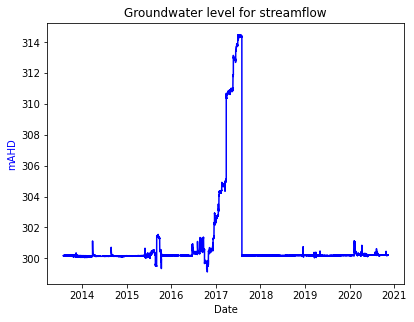

In [ ]:
fig,ax = plt.subplots()
ax.plot(streamflow_hourly['Date and Time'], streamflow_hourly['mAHD'], color="blue" )
ax.set_xlabel('Date')
ax.set_ylabel('mAHD', color='blue')
ax.set_title('Groundwater level for streamflow')
plt.show()

## Daily predictions for streamflow

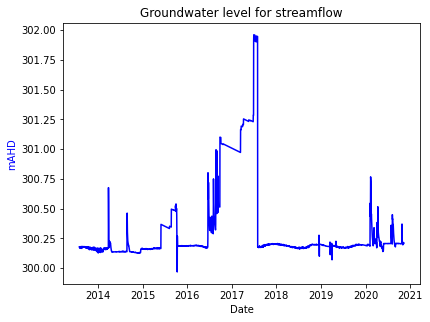

In [ ]:
window_length = 7
x_data = series_to_supervised(list(stream_daily['Rainfall']), n_in=0, n_out=window_length).iloc[:-1].to_numpy(float)
y_data = np.ediff1d(stream_daily['streamflow_mAHD'][1 - 1+window_length - 1:].to_numpy())
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

inputDim = window_length       # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 1000

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda()).float()
        labels = Variable(torch.from_numpy(y_train).cuda()).float()
    else:
        inputs = Variable(torch.from_numpy(x_train)).float()
        labels = Variable(torch.from_numpy(y_train).view(len(y_train), 1)).float()

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

loc, _ = np.where(streamflow_daily.isna())
for i in loc:
  start_time = streamflow_daily['Date and Time'][i] - datetime.timedelta(days=window_length)
  end_time = streamflow_daily['Date and Time'][i] - datetime.timedelta(days=1)
  mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
  entries = weather_data.loc[mask][-window_length:]
  x_values = np.pad(entries['Rainfall'], (0, window_length-len(entries['Rainfall'])))
  output = model(Variable(torch.from_numpy(x_values)).float()).data.item()
  streamflow_daily['mAHD'][i] = streamflow_daily['mAHD'][i-1] + output
fig,ax = plt.subplots()
ax.plot(streamflow_daily['Date and Time'], streamflow_daily['mAHD'], color="blue" )
ax.set_xlabel('Date')
ax.set_ylabel('mAHD', color='blue')
ax.set_title('Groundwater level for streamflow')
plt.show()

In [ ]:
fields = ['Stilling Well', 'mAHD']

streamflow = pd.read_csv('drive/MyDrive/Thesis/Thesis/Middle Creek surface.csv', skipinitialspace=True, usecols=fields)
streamflow = streamflow.rename(columns={'Stilling Well': 'Date and Time'})
streamflow['Date and Time'] = pd.to_datetime(streamflow['Date and Time'], dayfirst=True,errors='coerce')
streamflow_daily = streamflow['mAHD'].groupby(streamflow['Date and Time'].dt.to_period('D')).mean().to_frame().reset_index()
streamflow_daily['Date and Time'] = streamflow_daily['Date and Time'].dt.to_timestamp()
streamflow_daily['mAHD'] = streamflow_daily['mAHD'].dropna(axis=0)

In [ ]:
traindata = np.concatenate((x_train, y_train[:, None]), axis=1)
testdata = np.concatenate((x_test, y_test[:, None]), axis=1)
features = window_length
output = 1

activation = True
topology = [features, output]

MinCriteria = 0.005  # stop when RMSE reaches MinCriteria ( problem dependent)


numSamples = 2000 # need to decide yourself

mcmc = MCMC(numSamples, traindata, testdata, topology, activation)  # declare class

[pos_w, pos_tau, fx_train, fx_test,   rmse_train, rmse_test, accept_ratio] = mcmc.sampler()
print('sucessfully sampled')


fx_mu = fx_test.mean(axis=0)
fx_high = np.percentile(fx_test, 95, axis=0)
fx_low = np.percentile(fx_test, 5, axis=0)

fx_mu_tr = fx_train.mean(axis=0)
fx_high_tr = np.percentile(fx_train, 95, axis=0)
fx_low_tr = np.percentile(fx_train, 5, axis=0)


rmse_tr = np.mean(rmse_train)
rmsetr_std = np.std(rmse_train)
rmse_tes = np.mean(rmse_test)
rmsetest_std = np.std(rmse_test)

evaluate Initial w
-8491.433541893966  initial likelihood
-8097.976519538722 -1.9636480978421185 0.36515312128752614 0.36356920044607416 [ 0.14510484 -0.12503947 -0.80342211  1.04868521  0.01122175  0.26249776
 -1.15636538 -0.36063544] accepted
-7316.423891845139 -1.9673516926559227 0.3500410639894958 0.34844890212727664 [ 0.14911984 -0.10299057 -0.79373676  1.07036005 -0.02902084  0.27215258
 -1.17370514 -0.34483398] accepted
-6397.691661870178 -1.9692324463786832 0.3332031372125824 0.3313732344328159 [ 0.13192337 -0.09109329 -0.80521396  1.04335074 -0.02946793  0.27864884
 -1.16975762 -0.3278151 ] accepted
-4899.82032751653 -1.9480646946877034 0.3011770618783751 0.2989134826290557 [ 1.31673154e-01 -6.03216069e-02 -7.76339896e-01  1.00644345e+00
  9.42990024e-04  2.65918708e-01 -1.14672769e+00 -2.94209386e-01] accepted
-4181.501873416792 -1.9519916577156264 0.2840715816804829 0.2815137163225291 [ 0.16211739 -0.06942981 -0.82123054  1.00620534 -0.00533713  0.25497544
 -1.15239441 -0.27

[]

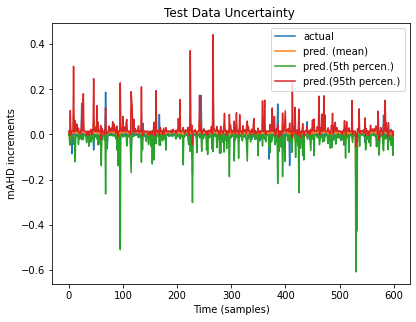

In [ ]:
ytestdata = testdata[:, features]
ytraindata = traindata[:, features]
x_test = np.linspace(0, testdata.shape[0], num=testdata.shape[0])
x_train = np.linspace(0, traindata.shape[0], num=traindata.shape[0])
plt.plot(x_test, ytestdata, label='actual')
plt.plot(x_test, fx_mu, label='pred. (mean)')
plt.plot(x_test, fx_low, label='pred.(5th percen.)')
plt.plot(x_test, fx_high, label='pred.(95th percen.)')
plt.fill_between(x_test, fx_low, fx_high, facecolor='g', alpha=0.4)
plt.legend(loc='upper right')
plt.xlabel('Time (samples)')
plt.ylabel('mAHD increments')
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Uncertainty of predictions.png',dpi=300)
plt.title("Test Data Uncertainty ")
plt.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


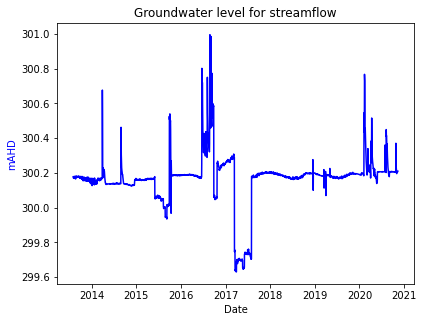

In [ ]:

loc, _ = np.where(streamflow_daily.isna())
for i in loc:
  start_time = streamflow_daily['Date and Time'][i] - datetime.timedelta(days=window_length)
  end_time = streamflow_daily['Date and Time'][i] - datetime.timedelta(days=1)
  mask = (weather_data['Date and Time'] > start_time) & (weather_data['Date and Time'] <= end_time)
  entries = weather_data.loc[mask][-window_length:]
  x_values = np.pad(entries['Rainfall'], (0, window_length-len(entries['Rainfall'])))
  output = predict_streamflow(pos_w[random.randint(0,len(pos_w)-1)], x_values, window_length)
  streamflow_daily['mAHD'][i] = streamflow_daily['mAHD'][i-1] + output
fig,ax = plt.subplots()
ax.plot(streamflow_daily['Date and Time'], streamflow_daily['mAHD'], color="blue" )
ax.set_xlabel('Date')
ax.set_ylabel('mAHD', color='blue')
ax.set_title('Groundwater level for streamflow')
plt.show()


## Re-merging new streamflow values

In [ ]:
m19_daily = pd.merge(streamflow_daily, BH_19_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m19_daily = m19_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m19_daily['SF_mAHD'])
streamflow_std = np.std(m19_daily['SF_mAHD'])
m19_daily['discretised_flow'] = np.abs((m19_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m19_daily['discretised_flow'] = m19_daily['discretised_flow'].astype(int)
m19_daily_rainfall = pd.merge(weather_data_daily, BH_19_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_19_daily_split = series_to_supervised(m19_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)


In [ ]:
m19_daily_rainfall = m19_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m19_daily_merged = pd.merge(m19_daily, m19_daily_rainfall, on='Date and Time')

In [ ]:
BH_19_daily_split

,var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var2(t),var3(t)
3,300.177664,299.757948,0.0,300.173297,299.767222,0.0,300.170282,299.776497,0.0,299.785771,0
4,300.173297,299.767222,0.0,300.170282,299.776497,0.0,300.171953,299.785771,0.0,299.795046,0
5,300.170282,299.776497,0.0,300.171953,299.785771,0.0,300.173122,299.795046,0.0,299.804321,0
6,300.171953,299.785771,0.0,300.173122,299.795046,0.0,300.169726,299.804321,0.0,299.813595,0
7,300.173122,299.795046,0.0,300.169726,299.804321,0.0,300.174993,299.813595,0.0,299.822870,0
...,...,...,...,...,...,...,...,...,...,...,...
2655,300.206321,298.910208,0.0,300.205273,298.961167,0.0,300.205254,298.946208,0.0,298.959875,0
2656,300.205273,298.961167,0.0,300.205254,298.946208,0.0,300.205798,298.959875,0.0,298.958896,0
2657,300.205254,298.946208,0.0,300.205798,298.959875,0.0,300.206215,298.958896,0.0,298.980333,0
2658,300.205798,298.959875,0.0,300.206215,298.958896,0.0,300.206185,298.980333,0.0,299.012354,0


In [ ]:
#m19_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m19_daily_merged.csv')

In [ ]:
#m19_daily.to_csv('drive/MyDrive/Thesis/Thesis/m19_daily.csv')

In [ ]:
m19_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m19_daily_rainfall.csv')

In [ ]:
m18_daily = pd.merge(streamflow_daily, BH_18_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m18_daily = m18_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m18_daily['SF_mAHD'])
streamflow_std = np.std(m18_daily['SF_mAHD'])
m18_daily['discretised_flow'] = np.abs((m18_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m18_daily['discretised_flow'] = m18_daily['discretised_flow'].astype(int)
m18_daily_rainfall = pd.merge(weather_data_daily, BH_18_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_18_daily_split = series_to_supervised(m18_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)

m18_daily_rainfall = m18_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m18_daily_merged = pd.merge(m18_daily, m18_daily_rainfall, on='Date and Time')

In [ ]:
#m18_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m18_daily_merged.csv')
#m18_daily.to_csv('drive/MyDrive/Thesis/Thesis/m18_daily.csv')
m18_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m18_daily_rainfall.csv')

In [ ]:
m17_daily = pd.merge(streamflow_daily, BH_17_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m17_daily = m17_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m17_daily['SF_mAHD'])
streamflow_std = np.std(m17_daily['SF_mAHD'])
m17_daily['discretised_flow'] = np.abs((m17_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m17_daily['discretised_flow'] = m17_daily['discretised_flow'].astype(int)
m17_daily_rainfall = pd.merge(weather_data_daily, BH_17_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_17_daily_split = series_to_supervised(m17_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)

m17_daily_rainfall = m17_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m17_daily_merged = pd.merge(m17_daily, m17_daily_rainfall, on='Date and Time')

In [ ]:
#m17_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m17_daily_merged.csv')
#m17_daily.to_csv('drive/MyDrive/Thesis/Thesis/m17_daily.csv')
m17_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m17_daily_rainfall.csv')

In [ ]:
m20_daily = pd.merge(streamflow_daily, BH_20_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m20_daily = m20_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m20_daily['SF_mAHD'])
streamflow_std = np.std(m20_daily['SF_mAHD'])
m20_daily['discretised_flow'] = np.abs((m20_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m20_daily['discretised_flow'] = m20_daily['discretised_flow'].astype(int)
m20_daily_rainfall = pd.merge(weather_data_daily, BH_20_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_20_daily_split = series_to_supervised(m20_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)

m20_daily_rainfall = m20_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m20_daily_merged = pd.merge(m20_daily, m20_daily_rainfall, on='Date and Time')

In [ ]:
m20_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m20_daily_merged.csv')
m20_daily.to_csv('drive/MyDrive/Thesis/Thesis/m20_daily.csv')
m20_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m20_daily_rainfall.csv')

In [ ]:
m21_daily = pd.merge(streamflow_daily, BH_21_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m21_daily = m21_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m21_daily['SF_mAHD'])
streamflow_std = np.std(m21_daily['SF_mAHD'])
m21_daily['discretised_flow'] = np.abs((m21_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m21_daily['discretised_flow'] = m21_daily['discretised_flow'].astype(int)
m21_daily_rainfall = pd.merge(weather_data_daily, BH_21_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_21_daily_split = series_to_supervised(m21_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)

m21_daily_rainfall = m21_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m21_daily_merged = pd.merge(m21_daily, m21_daily_rainfall, on='Date and Time')

In [ ]:
#m21_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m21_daily_merged.csv')
#m21_daily.to_csv('drive/MyDrive/Thesis/Thesis/m21_daily.csv')
m21_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m21_daily_rainfall.csv')

In [ ]:
m22_daily = pd.merge(streamflow_daily, BH_22_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)
m22_daily = m22_daily.rename(columns={'mAHD_x': 'SF_mAHD', 'mAHD_y': 'BH_mAHD'})
streamflow_mean = np.mean(m22_daily['SF_mAHD'])
streamflow_std = np.std(m22_daily['SF_mAHD'])
m22_daily['discretised_flow'] = np.abs((m22_daily['SF_mAHD'] - streamflow_mean)/streamflow_std) > 1
m22_daily['discretised_flow'] = m22_daily['discretised_flow'].astype(int)
m22_daily_rainfall = pd.merge(weather_data_daily, BH_22_daily, on='Date and Time').interpolate('ffill').dropna(axis=0)

BH_22_daily_split = series_to_supervised(m22_daily.drop(['Date and Time'], axis=1), 3, 1).drop(['var1(t)'], axis=1)

m22_daily_rainfall = m22_daily_rainfall.rename(columns={'mAHD': 'BH_mAHD'})
m22_daily_merged = pd.merge(m22_daily, m22_daily_rainfall, on='Date and Time')

In [ ]:
#m22_daily_merged.to_csv('drive/MyDrive/Thesis/Thesis/m22_daily_merged.csv')
#m22_daily.to_csv('drive/MyDrive/Thesis/Thesis/m22_daily.csv')
m22_daily_rainfall.to_csv('drive/MyDrive/Thesis/Thesis/m22_daily_rainfall.csv')

# Individual borehole models

## LSTM model for borehole 19

### Full model

In [ ]:
in_seq1 = array(m19_daily_merged['mAHD_x'][:-1])
in_seq2 = array(m19_daily_merged['mAHD_y'][:-1])
in_seq3 = array(m19_daily_merged['Rainfall'][:-1])
out_seq = array(m19_daily_merged['mAHD_y'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2,in_seq3, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily_merged[m19_daily_merged['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily_merged[m19_daily_merged['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
rainfall_post_2017 = in_seq3[num_pre_2017:]
Num_Exp = 15
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_full_recursive=np.zeros(Num_Exp)
test_acc_full_recursive=np.zeros(Num_Exp)
Step_RMSE_full_recursive=np.zeros([Num_Exp,n_steps_out])

model_full_recursive = Sequential()
model_full_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_full_recursive.add(Dense(n_steps_out))
model_full_recursive.compile(optimizer='adam', loss='mse')
model_full_recursive.summary()
Best_RMSE_full_recursive=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_full_recursive
    #batch_size=64,
    model_full_recursive.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_full_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively_3(model_full_recursive, x_test_extra_samples[0][:,1], streamflow_post_2017, rainfall_post_2017,num_post_2017-3, 3)
    train_acc_full_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_full_recursive[run] = rmse( y_predicttest, y_test)
    if test_acc_full_recursive[run]<Best_RMSE_full_recursive:
        Best_RMSE_full_recursive=test_acc_full_recursive[run]
        Best_Predict_Test_full_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_full_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_full_recursive[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

### Univariate model

In [ ]:
in_seq1 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 50
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_univar_19_recursive=np.zeros(Num_Exp)
test_acc_univar_19_recursive=np.zeros(Num_Exp)
Step_RMSE_univar_19_recursive=np.zeros([Num_Exp,n_steps_out])

model_univar_19_recursive = Sequential()
model_univar_19_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_univar_19_recursive.add(Dense(n_steps_out))
model_univar_19_recursive.compile(optimizer='adam', loss='mse')
model_univar_19_recursive.summary()
Best_RMSE_univar_19_recursive=1000   #Assigning a large number

outputs_univar_19_recursive = np.ones((Num_Exp, y_test.shape[0]))
start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_univar_19_recursive
    #batch_size=64,
    model_univar_19_recursive.fit(x_train, y_train, batch_size = 16, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_univar_19_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively_univariate(model_univar_19_recursive, x_test_extra_samples[0], num_post_2017-3, 3)
    train_acc_univar_19_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_univar_19_recursive[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_univar_19_recursive[run])
    outputs_univar_19_recursive[run,] = y_predicttest
    if test_acc_univar_19_recursive[run]<Best_RMSE_univar_19_recursive:
        Best_RMSE_univar_19_recursive=test_acc_univar_19_recursive[run]
        Best_Predict_Test_univar_19_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_univar_19_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 23.639478259861715
Experiment 2 in progress
RMSE value: 22.66591971532262
Experiment 3 in progress
RMSE value: 21.770006875115794
Experiment 4 in progress
RMSE value: 20.9143506400883
Experiment 5 in progress
RMSE value: 20.09526529146949
Experiment 6 in progress
RMSE value: 19.356871001642585
Experiment 7 in progress
RMSE value: 18.663540117050534
Experiment 8 in progress
RMSE value: 17.996565035773905
Experime

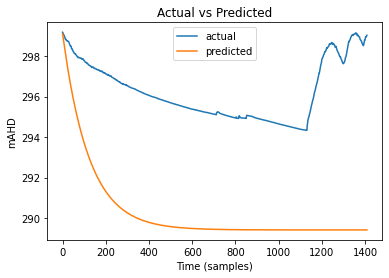

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_univar_19_recursive[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:
in_seq1 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

Num_Exp = 15
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_univar_19_post_2017=np.zeros(Num_Exp)
test_acc_univar_19_post_2017=np.zeros(Num_Exp)
Step_RMSE_univar_19_post_2017=np.zeros([Num_Exp,n_steps_out])

model_univar_19_post_2017 = Sequential()
model_univar_19_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_univar_19_post_2017.add(Dense(n_steps_out))
model_univar_19_post_2017.compile(optimizer='adam', loss='mse')
model_univar_19_post_2017.summary()
Best_RMSE_univar_19_post_2017=1000   #Assigning a large number


start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_univar_19_post_2017
    #batch_size=64,
    model_univar_19_post_2017.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_univar_19_post_2017.predict(x_train).flatten()
    y_predicttest = model_univar_19_post_2017.predict(x_test).flatten()
    train_acc_univar_19_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_univar_19_post_2017[run] = rmse( y_predicttest, y_test)
    if test_acc_univar_19_post_2017[run]<Best_RMSE_univar_19_post_2017:
        Best_RMSE_univar_19_post_2017=test_acc_univar_19_post_2017[run]
        Best_Predict_Test_univar_19_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_univar_19_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
Experiment 2 in progress
Experiment 3 in progress
Experiment 4 in progress
Experiment 5 in progress
Experiment 6 in progress
Experiment 7 in progress
Experiment 8 in progress
Experiment 9 in progress
Experiment 10 in progress
Experiment 11 in progress
Experiment 12 in progress
Experiment 13 in progress
Experiment 14 in progress
Experiment 15 in progress
Total time for 15 experiments 1665.8672354221344


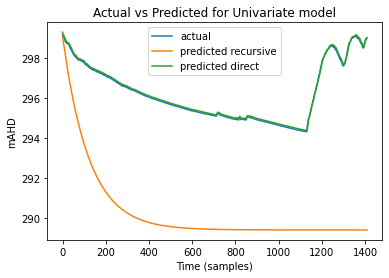

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_univar_19_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_univar_19_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Univariate model')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Univar_19_post_2017.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_19_pre_2017 = m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_19_post_2017 = m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh19_Best_Predict_Test_post_2017 = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_univar_19_recursive[:])
bh19_Best_Predict_Test_recursive = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_univar_19_post_2017[:])
actual = np.append(BH_19_pre_2017['BH_mAHD'], BH_19_post_2017['BH_mAHD'][:-3])

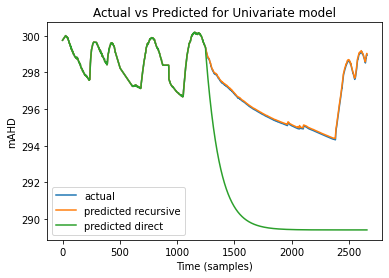

In [ ]:
x_data=np.linspace(0,bh19_Best_Predict_Test_post_2017.shape[0], num=bh19_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh19_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.plot(x_data, bh19_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Univariate model')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Univar_19.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_univar_19_post_2017

0.06790576194162609

In [ ]:
Best_RMSE_univar_19_recursive

6.2368901648362565

In [ ]:
Best_NSE_univar_19_post_2017 = r2_score(Best_Predict_Test_univar_19_post_2017, y_test[:])
Best_NSE_univar_19_recursive = r2_score(Best_Predict_Test_univar_19_recursive, y_test[:])

In [ ]:
Best_NSE_univar_19_post_2017

0.9977286147824266

In [ ]:
Best_NSE_univar_19_recursive

-10.38728509227479

In [ ]:


saved_map = {
    'outputs_univar_19_recursive': outputs_univar_19_recursive,
    'model_univar_19_post_2017': model_univar_19_post_2017,
    'train_acc_univar_19_post_2017': train_acc_univar_19_post_2017,
    'test_acc_univar_19_post_2017': test_acc_univar_19_post_2017,
    'Step_RMSE_univar_19_post_2017': Step_RMSE_univar_19_post_2017,
    'Best_Predict_test_univar_19_post_2017': Best_Predict_Test_univar_19_post_2017,
    'Best_RMSE_univar_19_post_2017': Best_RMSE_univar_19_post_2017,
    'Best_NSE_univar_19_post_2017': Best_NSE_univar_19_post_2017,
    'model_univar_19_recursive': model_univar_19_recursive,
    'train_acc_univar_19_recursive': train_acc_univar_19_recursive,
    'test_acc_univar_19_recursive': test_acc_univar_19_recursive,
    'Step_RMSE_univar_19_recursive': Step_RMSE_univar_19_recursive,
    'Best_Predict_test_univar_19_recursive': Best_Predict_Test_univar_19_recursive,
    'Best_RMSE_univar_19_recursive': Best_RMSE_univar_19_recursive,
    'Best_NSE_univar_19_recursive': Best_NSE_univar_19_recursive,

    'outputs_univar_18_recursive': outputs_univar_18_recursive,
    'model_univar_18_post_2017': model_univar_18_post_2017,
    'train_acc_univar_18_post_2017': train_acc_univar_18_post_2017,
    'test_acc_univar_18_post_2017': test_acc_univar_18_post_2017,
    'Step_RMSE_univar_18_post_2017': Step_RMSE_univar_18_post_2017,
    'Best_predict_test_univar_18_post_2017': Best_Predict_Test_univar_18_post_2017,
    'Best_RMSE_univar_18_post_2017': Best_RMSE_univar_18_post_2017,
    'Best_NSE_univar_18_post_2017': Best_NSE_univar_18_post_2017,
    'model_univar_18_recursive': model_univar_18_recursive,
    'train_acc_univar_18_recursive': train_acc_univar_18_recursive,
    'test_acc_univar_18_recursive': test_acc_univar_18_recursive,
    'Step_RMSE_univar_18_recursive': Step_RMSE_univar_18_recursive,
    'Best_predict_test_univar_18_recursive': Best_Predict_Test_univar_18_recursive,
    'Best_RMSE_univar_18_recursive': Best_RMSE_univar_18_recursive,
    'Best_NSE_univar_18_recursive': Best_NSE_univar_18_recursive,

    'outputs_univar_17_recursive': outputs_univar_17_recursive,
    'model_univar_17_post_2017': model_univar_17_post_2017,
    'train_acc_univar_17_post_2017': train_acc_univar_17_post_2017,
    'test_acc_univar_17_post_2017': test_acc_univar_17_post_2017,
    'Step_RMSE_univar_17_post_2017': Step_RMSE_univar_17_post_2017,
    'Best_predict_test_univar_17_post_2017': Best_Predict_Test_univar_17_post_2017,
    'Best_RMSE_univar_17_post_2017': Best_RMSE_univar_17_post_2017,
    'Best_NSE_univar_17_post_2017': Best_NSE_univar_17_post_2017,
    'model_univar_17_recursive': model_univar_17_recursive,
    'train_acc_univar_17_recursive': train_acc_univar_17_recursive,
    'test_acc_univar_17_recursive': test_acc_univar_17_recursive,
    'Step_RMSE_univar_17_recursive': Step_RMSE_univar_17_recursive,
    'Best_predict_test_univar_17_recursive': Best_Predict_Test_univar_17_recursive,
    'Best_RMSE_univar_17_recursive': Best_RMSE_univar_17_recursive,
    'Best_NSE_univar_17_recursive': Best_NSE_univar_17_recursive,
}

# Save the python variable 'saved_map' to a Drive file named 'variables.pickle'.
#
# Because it's stored in Drive, this file will persist even if the VM times out.

pick_insert = open('drive/My Drive/Thesis/Thesis/data_univar.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

In [ ]:
pick_read = open('drive/My Drive/Thesis/Thesis/data_univar.pickle','rb')
data19 = pickle.load(pick_read)
pick_read.close()

#Best_NSE_streamflow_recursive = data19['Best_NSE_streamflow_recursive']
outputs_univar_19_recursive = data19['outputs_univar_19_recursive']
model_univar_19_post_2017 = data19['model_univar_19_post_2017']
train_acc_univar_19_post_2017 = data19['train_acc_univar_19_post_2017']
test_acc_univar_19_post_2017 = data19['test_acc_univar_19_post_2017']
Step_RMSE_univar_19_post_2017 = data19['Step_RMSE_univar_19_post_2017']
Best_Predict_Test_univar_19_post_2017 = data19['Best_predict_test_univar_19_post_2017']
Best_RMSE_univar_19_post_2017 = data19['Best_RMSE_univar_19_post_2017']
Best_NSE_univar_19_post_2017 = data19['Best_NSE_univar_19_post_2017']

model_univar_19_recursive = data19['model_univar_19_recursive']
train_acc_univar_19_recursive = data19['train_acc_univar_19_recursive']
test_acc_univar_19_recursive = data19['test_acc_univar_19_recursive']
Step_RMSE_univar_19_recursive = data19['Step_RMSE_univar_19_recursive']
Best_Predict_Test_univar_19_recursive = data19['Best_predict_test_univar_19_recursive']
Best_RMSE_univar_19_recursive = data19['Best_RMSE_univar_19_recursive']
Best_NSE_univar_19_recursive = data19['Best_NSE_univar_19_recursive']

model_univar_18_recursive = data19['model_univar_18_recursive']
train_acc_univar_18_recursive = data19['train_acc_univar_18_recursive']
test_acc_univar_18_recursive = data19['test_acc_univar_18_recursive']
Step_RMSE_univar_18_recursive = data19['Step_RMSE_univar_18_recursive']
Best_Predict_Test_univar_18_recursive = data19['Best_predict_test_univar_18_recursive']
Best_RMSE_univar_18_recursive = data19['Best_RMSE_univar_18_recursive']
Best_NSE_univar_18_recursive = data19['Best_NSE_univar_18_recursive']

outputs_univar_18_recursive = data19['outputs_univar_18_recursive']
model_univar_18_post_2017 = data19['model_univar_18_post_2017']
train_acc_univar_18_post_2017 = data19['train_acc_univar_18_post_2017']
test_acc_univar_18_post_2017 = data19['test_acc_univar_18_post_2017']
Step_RMSE_univar_18_post_2017 = data19['Step_RMSE_univar_18_post_2017']
Best_Predict_Test_univar_18_post_2017 = data19['Best_predict_test_univar_18_post_2017']
Best_RMSE_univar_18_post_2017 = data19['Best_RMSE_univar_18_post_2017']
Best_NSE_univar_18_post_2017 = data19['Best_NSE_univar_18_post_2017']

outputs_univar_17_recursive = data19['outputs_univar_17_recursive']
model_univar_17_post_2017 = data19['model_univar_17_post_2017']
train_acc_univar_17_post_2017 = data19['train_acc_univar_17_post_2017']
test_acc_univar_17_post_2017 = data19['test_acc_univar_17_post_2017']
Step_RMSE_univar_17_post_2017 = data19['Step_RMSE_univar_17_post_2017']
Best_Predict_Test_univar_17_post_2017 = data19['Best_predict_test_univar_17_post_2017']
Best_RMSE_univar_17_post_2017 = data19['Best_RMSE_univar_17_post_2017']
Best_NSE_univar_17_post_2017 = data19['Best_NSE_univar_17_post_2017']

model_univar_17_recursive = data19['model_univar_17_recursive']
train_acc_univar_17_recursive = data19['train_acc_univar_17_recursive']
test_acc_univar_17_recursive = data19['test_acc_univar_17_recursive']
Step_RMSE_univar_17_recursive = data19['Step_RMSE_univar_17_recursive']
Best_Predict_Test_univar_17_recursive = data19['Best_predict_test_univar_17_recursive']
Best_RMSE_univar_17_recursive = data19['Best_RMSE_univar_17_recursive']
Best_NSE_univar_17_recursive = data19['Best_NSE_univar_17_recursive']



### Streamflow

In [ ]:
in_seq1 = array(m19_daily['SF_mAHD'][:-1])
in_seq2 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

x_train = X[0:int(len(X)*4/5)]
x_test = X[int(len(X)*4/5):]
y_train = y[0:int(len(y)*4/5)]
y_test = y[int(len(y)*4/5):]
n_features = X.shape[2]
Num_Exp = 10
n_steps_out = 1
Hidden=10
Epochs=1000




train_acc_streamflow=np.zeros(Num_Exp)
test_acc_streamflow=np.zeros(Num_Exp)
Step_RMSE_streamflow=np.zeros([Num_Exp,n_steps_out])

model_streamflow = Sequential()
model_streamflow.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow.add(Dense(n_steps_out))
model_streamflow.compile(optimizer='adam', loss='mse')
model_streamflow.summary()
Best_RMSE_streamflow=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow
    #batch_size=64,
    model_streamflow.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow.predict(x_train).flatten()
    y_predicttest = model_streamflow.predict(x_test).flatten()
    train_acc_streamflow[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow[run] = rmse( y_predicttest, y_test)
    if test_acc_streamflow[run]<Best_RMSE_streamflow:
        Best_RMSE_streamflow=test_acc_streamflow[run]
        Best_Predict_Test_streamflow=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                520       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress


KeyboardInterrupt: ignored

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

#### Post 2017

In [ ]:
in_seq1 = array(m19_daily['SF_mAHD'][:-1])
in_seq2 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_streamflow_recursive=np.zeros(Num_Exp)
test_acc_streamflow_recursive=np.zeros(Num_Exp)
Step_RMSE_streamflow_recursive=np.zeros([Num_Exp,n_steps_out])

model_streamflow_recursive = Sequential()
model_streamflow_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_recursive.add(Dense(n_steps_out))
model_streamflow_recursive.compile(optimizer='adam', loss='mse')
model_streamflow_recursive.summary()
Best_RMSE_streamflow_recursive=1000   #Assigning a large number


outputs_streamflow_recursive = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_recursive
    #batch_size=64,
    model_streamflow_recursive.fit(x_train, y_train, epochs=Epochs, verbose=0, batch_size=16, shuffle=False)
    y_predicttrain = model_streamflow_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively(model_streamflow_recursive, x_test_extra_samples[0][:,1], streamflow_post_2017,num_post_2017-3, 3)
    train_acc_streamflow_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_recursive[run] = rmse( y_predicttest, y_test)
    outputs_streamflow_recursive[run,] = y_predicttest
    print("RMSE value:", test_acc_streamflow_recursive[run])
    if test_acc_streamflow_recursive[run]<Best_RMSE_streamflow_recursive:
        Best_RMSE_streamflow_recursive=test_acc_streamflow_recursive[run]
        Best_Predict_Test_streamflow_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 2.407564864816657
Experiment 2 in progress
RMSE value: 3.471916833081184
Experiment 3 in progress
RMSE value: 3.163398044136603
Experiment 4 in progress
RMSE value: 3.442266640613492
Experiment 5 in progress
RMSE value: 3.433335042098217
Experiment 6 in progress
RMSE value: 3.428086850358096
Experiment 7 in progress
RMSE value: 3.425995221841132
Experiment 8 in progress
RMSE value: 3.4261777620349863
Experiment

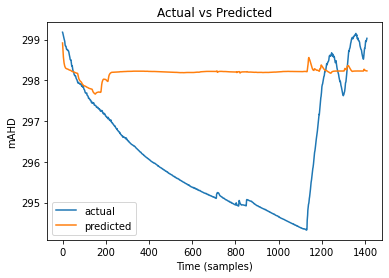

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_recursive[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:
in_seq1 = array(m19_daily['SF_mAHD'][:-1])
in_seq2 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_streamflow_post_2017=np.zeros(Num_Exp)
test_acc_streamflow_post_2017=np.zeros(Num_Exp)
Step_RMSE_streamflow_post_2017=np.zeros([Num_Exp,n_steps_out])

model_streamflow_post_2017 = Sequential()
model_streamflow_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_post_2017.add(Dense(n_steps_out))
model_streamflow_post_2017.compile(optimizer='adam', loss='mse')
model_streamflow_post_2017.summary()
Best_RMSE_streamflow_post_2017=1000   #Assigning a large number

outputs_streamflow_post_2017 = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_post_2017
    #batch_size=64,
    model_streamflow_post_2017.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_post_2017.predict(x_train).flatten()
    y_predicttest = model_streamflow_post_2017.predict(x_test).flatten()
    train_acc_streamflow_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_post_2017[run] = rmse( y_predicttest, y_test)
    outputs_streamflow_post_2017[run,] = y_predicttest
    print("RMSE value:", test_acc_streamflow_post_2017[run])
    if test_acc_streamflow_post_2017[run]<Best_RMSE_streamflow_post_2017:
        Best_RMSE_streamflow_post_2017=test_acc_streamflow_post_2017[run]
        Best_Predict_Test_streamflow_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 1.750834405456828
Experiment 2 in progress
RMSE value: 1.6224903026039799
Experiment 3 in progress
RMSE value: 1.4969553679907752
Experiment 4 in progress
RMSE value: 1.3818339559869497
Experiment 5 in progress
RMSE value: 1.288546709127701
Experiment 6 in progress
RMSE value: 1.2332074025390651
Experiment 7 in progress
RMSE value: 1.2288751004762075
Experiment 8 in progress
RMSE value: 1.2626866661794456
Experi

In [ ]:
Best_Predict_Test_streamflow_recursive = Best_Predict_Test_streamflow_recursive[0]

In [ ]:
fx_high_post_2017 = np.percentile(outputs_streamflow_post_2017, 95, axis=0)
fx_low_post_2017 = np.percentile(outputs_streamflow_post_2017, 5, axis=0)
fx_mid_post_2017 = np.percentile(outputs_streamflow_post_2017, 50, axis=0)
fx_high_recursive = np.percentile(outputs_streamflow_recursive, 95, axis=0)
fx_low_recursive = np.percentile(outputs_streamflow_recursive, 5, axis=0)
fx_mid_recursive = np.percentile(outputs_streamflow_recursive, 50, axis=0)
in_between_percentage_streamflow_recursive = np.count_nonzero(np.less(fx_low_recursive,y_test) & np.greater_equal(fx_high_recursive,y_test) )/len(y_test)
in_between_percentage_streamflow_recursive

0.0

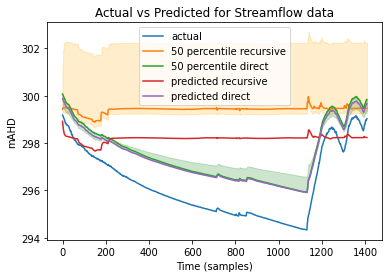

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')
plt.plot(x_data, Best_Predict_Test_streamflow_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_post_2017[:], label='predicted direct')
plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_post_2017.png',dpi=300)
plt.show()
plt.close()

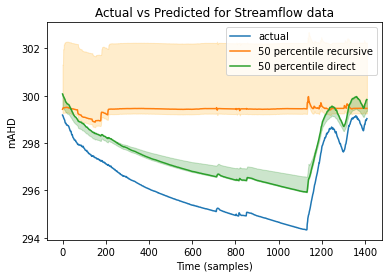

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')

plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_post_2017_50_only.png',dpi=300)
plt.show()
plt.close()

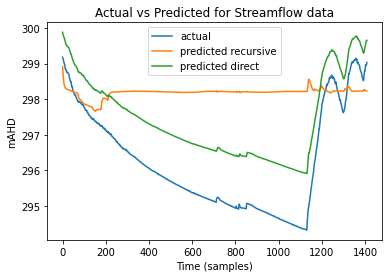

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_post_2017_best_only.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_19_pre_2017 = m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_19_post_2017 = m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh19_Best_Predict_Test_post_2017 = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_post_2017[:])
bh19_Best_Predict_Test_recursive = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_recursive[:])
actual = np.append(BH_19_pre_2017['BH_mAHD'], BH_19_post_2017['BH_mAHD'][:-3])

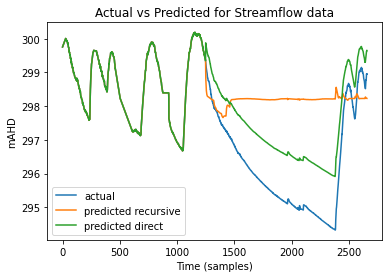

In [ ]:
x_data=np.linspace(0,bh19_Best_Predict_Test_post_2017.shape[0], num=bh19_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh19_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.plot(x_data, bh19_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_streamflow_post_2017

1.2288751004762075

In [ ]:
Best_RMSE_streamflow_recursive

2.407564864816657

In [ ]:
Best_NSE_streamflow_post_2017 = r2_score(Best_Predict_Test_streamflow_post_2017, y_test[:])
Best_NSE_streamflow_recursive = r2_score(Best_Predict_Test_streamflow_recursive, y_test[:])

In [ ]:
Best_NSE_streamflow_post_2017

-0.15610089652703074

In [ ]:
Best_NSE_streamflow_recursive

-349.376051263914

In [ ]:
pick_read = open('drive/My Drive/Thesis/Thesis/data_19_streamflow_post_2017.pickle','rb')
data17 = pickle.load(pick_read)
pick_read.close()


model_streamflow_recursive = data17['model_streamflow_recursive'],
train_acc_streamflow_recursive = data17['train_acc_streamflow_recursive'],
test_acc_streamflow_recursive = data17['test_acc_streamflow_recursive'],
Step_RMSE_streamflow_recursive = data17['Step_RMSE_streamflow_recursive'],
Best_Predict_Test_streamflow_recursive = data17['Best_predict_test_streamflow_recursive'],
Best_RMSE_streamflow_recursive = data17['Best_RMSE_streamflow_recursive'],
Best_NSE_streamflow_recursive = data17['Best_NSE_streamflow_recursive'],
outputs_streamflow_recursive = data17['outputs_streamflow_recursive'],

in_between_percentage_streamflow_recursive = data17['in_between_percentage_streamflow_recursive']

# model_streamflow_post_2017 = data17['model_streamflow_post_2017'],
# train_acc_streamflow_post_2017 = data17['train_acc_streamflow_post_2017'],
# test_acc_streamflow_post_2017 = data17['test_acc_streamflow_post_2017'],
# Step_RMSE_streamflow_post_2017 = data17['Step_RMSE_streamflow_post_2017'],
# Best_Predict_Test_streamflow_post_2017 = data17['Best_predict_test_streamflow_post_2017'],
# Best_RMSE_streamflow_post_2017 = data17['Best_RMSE_streamflow_post_2017'],
# Best_NSE_streamflow_post_2017 = data17['Best_NSE_streamflow_post_2017'],
# outputs_streamflow_post_2017 = data17['outputs_streamflow_post_2017'],

KeyError: ignored

In [ ]:
saved_map = {
    'outputs_streamflow_recursive':outputs_streamflow_recursive,
    'model_streamflow_recursive': model_streamflow_recursive,
    'train_acc_streamflow_recursive': train_acc_streamflow_recursive,
    'test_acc_streamflow_recursive': test_acc_streamflow_recursive,
    'Step_RMSE_streamflow_recursive': Step_RMSE_streamflow_recursive,
    'Best_predict_test_streamflow_recursive': Best_Predict_Test_streamflow_recursive,
    'Best_RMSE_streamflow_recursive': Best_RMSE_streamflow_recursive,
    'Best_NSE_streamflow_recursive':Best_NSE_streamflow_recursive,
    #'RMSE_outputs_streamflow_recursive':RMSE_outputs_streamflow_recursive,

    'outputs_streamflow_post_2017':outputs_streamflow_post_2017,
    'model_streamflow_post_2017': model_streamflow_post_2017,
    'train_acc_streamflow_post_2017': train_acc_streamflow_post_2017,
    'test_acc_streamflow_post_2017': test_acc_streamflow_post_2017,
    'Step_RMSE_streamflow_post_2017': Step_RMSE_streamflow_post_2017,
    'Best_predict_test_streamflow_post_2017': Best_Predict_Test_streamflow_post_2017,
    'Best_RMSE_streamflow_post_2017': Best_RMSE_streamflow_post_2017,
    'Best_NSE_streamflow_post_2017':Best_NSE_streamflow_post_2017,
    #'RMSE_outputs_streamflow_post_2017':RMSE_outputs_streamflow_post_2017,
    'in_between_percentage_streamflow_recursive': in_between_percentage_streamflow_recursive,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_19_streamflow_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

### Discretised streamflow

In [ ]:

in_seq1 = array(m19_daily['discretised_flow'][:-1])
in_seq2 = array(m19_daily['mAHD_y'][:-1])
out_seq = array(m19_daily['mAHD_y'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

x_train = X[0:int(len(X)*4/5)]
x_test = X[int(len(X)*4/5):]
y_train = y[0:int(len(y)*4/5)]
y_test = y[int(len(y)*4/5):]
n_features = X.shape[2]
Num_Exp = 10
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_streamflow_discretised=np.zeros(Num_Exp)
test_acc_streamflow_discretised=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised = Sequential()
model_streamflow_discretised.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised.add(Dense(n_steps_out))
model_streamflow_discretised.compile(optimizer='adam', loss='mse')
model_streamflow_discretised.summary()
Best_RMSE_streamflow_discretised=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised
    #batch_size=64,
    model_streamflow_discretised.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised.predict(x_train).flatten()
    y_predicttest = model_streamflow_discretised.predict(x_test).flatten()
    train_acc_streamflow_discretised[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised[run] = rmse( y_predicttest, y_test)
    if test_acc_streamflow_discretised[run]<Best_RMSE_streamflow_discretised:
        Best_RMSE_streamflow_discretised=test_acc_streamflow_discretised[run]
        Best_Predict_Test_streamflow_discretised=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

#### Post 2017


In [ ]:

in_seq1 = array(m19_daily['discretised_flow'][:-1])
in_seq2 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)


num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_discretised_recursive_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_streamflow_discretised_recursive=np.zeros(Num_Exp)
test_acc_streamflow_discretised_recursive=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised_recursive=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised_recursive = Sequential()
model_streamflow_discretised_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised_recursive.add(Dense(n_steps_out))
model_streamflow_discretised_recursive.compile(optimizer='adam', loss='mse')
model_streamflow_discretised_recursive.summary()
Best_RMSE_streamflow_discretised_recursive=1000   #Assigning a large number

start_time=time.time()
outputs_streamflow_discretised_recursive = np.ones((Num_Exp, y_test.shape[0]))

for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised_recursive
    #batch_size=64,
    model_streamflow_discretised_recursive.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively(model_streamflow_discretised_recursive, x_test_extra_samples[0][:,1], streamflow_discretised_recursive_post_2017,num_post_2017-3, 3)
    train_acc_streamflow_discretised_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised_recursive[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_streamflow_discretised_recursive[run])
    outputs_streamflow_discretised_recursive[run,] = y_predicttest
    if test_acc_streamflow_discretised_recursive[run]<Best_RMSE_streamflow_discretised_recursive:
        Best_RMSE_streamflow_discretised_recursive=test_acc_streamflow_discretised_recursive[run]
        Best_Predict_Test_streamflow_discretised_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 10)                520       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 14.137864186355754
Experiment 2 in progress
RMSE value: 13.553272574808608
Experiment 3 in progress
RMSE value: 12.992051342429205
Experiment 4 in progress
RMSE value: 12.434053233017105
Experiment 5 in progress
RMSE value: 11.932885483726812
Experiment 6 in progress
RMSE value: 11.448899002463056
Experiment 7 in progress
RMSE value: 10.979322626712149
Experiment 8 in progress
RMSE value: 10.525030525892602
Exp

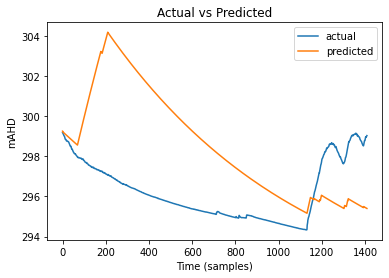

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_recursive[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:

in_seq1 = array(m19_daily['discretised_flow'][:-1])
in_seq2 = array(m19_daily['BH_mAHD'][:-1])
out_seq = array(m19_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)


num_pre_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_discretised_recursive_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000

train_acc_streamflow_discretised_post_2017=np.zeros(Num_Exp)
test_acc_streamflow_discretised_post_2017=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised_post_2017=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised_post_2017 = Sequential()
model_streamflow_discretised_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised_post_2017.add(Dense(n_steps_out))
model_streamflow_discretised_post_2017.compile(optimizer='adam', loss='mse')
model_streamflow_discretised_post_2017.summary()
Best_RMSE_streamflow_discretised_post_2017=1000   #Assigning a large number

outputs_streamflow_discretised_post_2017 = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised_post_2017
    #batch_size=64,
    model_streamflow_discretised_post_2017.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised_post_2017.predict(x_train).flatten()
    y_predicttest = model_streamflow_discretised_post_2017.predict(x_test).flatten()
    train_acc_streamflow_discretised_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised_post_2017[run] = rmse( y_predicttest, y_test)
    print("RMSE: ", test_acc_streamflow_discretised_post_2017[run])
    outputs_streamflow_discretised_post_2017[run,] = y_predicttest
    if test_acc_streamflow_discretised_post_2017[run]<Best_RMSE_streamflow_discretised_post_2017:
        Best_RMSE_streamflow_discretised_post_2017=test_acc_streamflow_discretised_post_2017[run]
        Best_Predict_Test_streamflow_discretised_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10)                520       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE:  0.08971560752903594
Experiment 2 in progress
RMSE:  0.08873782780852849
Experiment 3 in progress
RMSE:  0.08778323426690172
Experiment 4 in progress
RMSE:  0.08692353640850999
Experiment 5 in progress
RMSE:  0.08593543029663606
Experiment 6 in progress
RMSE:  0.08505423842703336
Experiment 7 in progress
RMSE:  0.08415605926091928
Experiment 8 in progress
RMSE:  0.08308655560778028
Experiment 9 in progress
RMSE:  0.08

In [ ]:
outputs_streamflow_discretised_recursive_1 = outputs_streamflow_discretised_recursive

In [ ]:
outputs_streamflow_discretised_recursive = outputs_streamflow_discretised_recursive_1[19:]

In [ ]:
fx_high_post_2017 = np.percentile(outputs_streamflow_discretised_post_2017, 95, axis=0)
fx_low_post_2017 = np.percentile(outputs_streamflow_discretised_post_2017, 5, axis=0)
fx_mid_post_2017 = np.percentile(outputs_streamflow_discretised_post_2017, 50, axis=0)
fx_high_recursive = np.percentile(outputs_streamflow_discretised_recursive, 95, axis=0)
fx_low_recursive = np.percentile(outputs_streamflow_discretised_recursive, 5, axis=0)
fx_mid_recursive = np.percentile(outputs_streamflow_discretised_recursive, 50, axis=0)
in_between_percentage_streamflow_discretised_recursive = np.count_nonzero(np.less(fx_low_recursive,y_test) & np.greater_equal(fx_high_recursive,y_test) )/len(y_test)
in_between_percentage_streamflow_discretised_recursive

0.875

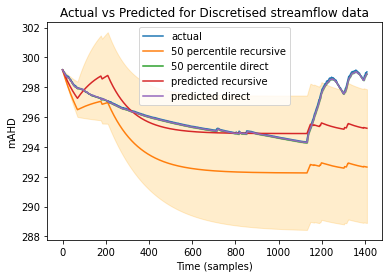

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_post_2017[:], label='predicted direct')
plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_post_2017.png',dpi=300)
plt.show()
plt.close()

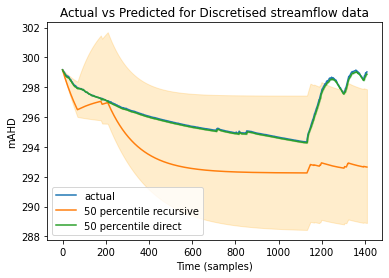

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')

plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_post_2017_50_only.png',dpi=300)
plt.show()
plt.close()

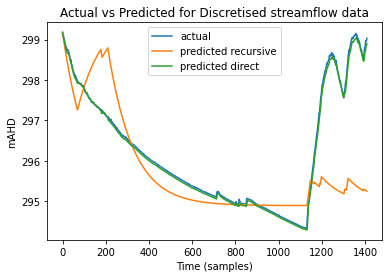

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Discretised_streamflow_post_2017_best_only.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_19_pre_2017 = m19_daily[m19_daily['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_19_post_2017 = m19_daily[m19_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh19_Best_Predict_Test_post_2017 = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_discretised_post_2017[:])
bh19_Best_Predict_Test_recursive = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_discretised_recursive[:])
actual = np.append(BH_19_pre_2017['BH_mAHD'], BH_19_post_2017['BH_mAHD'][:-3])

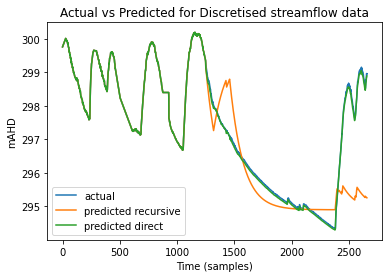

In [ ]:
x_data=np.linspace(0,bh19_Best_Predict_Test_post_2017.shape[0], num=bh19_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh19_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.plot(x_data, bh19_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Discretised_streamflow.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_streamflow_discretised_post_2017

0.06538793390722145

In [ ]:
Best_RMSE_streamflow_discretised_recursive

1.3325214199038875

In [ ]:
Best_NSE_streamflow_discretised_post_2017 = r2_score(Best_Predict_Test_streamflow_discretised_post_2017, y_test[:])
Best_NSE_streamflow_discretised_recursive = r2_score(Best_Predict_Test_streamflow_discretised_recursive, y_test[:])

In [ ]:
Best_NSE_streamflow_discretised_post_2017

0.9978778108767076

In [ ]:
Best_NSE_streamflow_discretised_recursive

-0.17060287128325058

In [ ]:
saved_map = {
    'outputs_streamflow_discretised_recursive':outputs_streamflow_discretised_recursive,
    'model_streamflow_discretised_recursive': model_streamflow_discretised_recursive,
    'train_acc_streamflow_discretised_recursive': train_acc_streamflow_discretised_recursive,
    'test_acc_streamflow_discretised_recursive': test_acc_streamflow_discretised_recursive,
    'Step_RMSE_streamflow_discretised_recursive': Step_RMSE_streamflow_discretised_recursive,
    'Best_predict_test_streamflow_discretised_recursive': Best_Predict_Test_streamflow_discretised_recursive,
    'Best_RMSE_streamflow_discretised_recursive': Best_RMSE_streamflow_discretised_recursive,
    'Best_NSE_streamflow_discretised_recursive':Best_NSE_streamflow_discretised_recursive,
    #'RMSE_outputs_streamflow_discretised_recursive':RMSE_outputs_streamflow_discretised_recursive,

    'outputs_streamflow_discretised_post_2017':outputs_streamflow_discretised_post_2017,
    'model_streamflow_discretised_post_2017': model_streamflow_discretised_post_2017,
    'train_acc_streamflow_discretised_post_2017': train_acc_streamflow_discretised_post_2017,
    'test_acc_streamflow_discretised_post_2017': test_acc_streamflow_discretised_post_2017,
    'Step_RMSE_streamflow_discretised_post_2017': Step_RMSE_streamflow_discretised_post_2017,
    'Best_predict_test_streamflow_discretised_post_2017': Best_Predict_Test_streamflow_discretised_post_2017,
    'Best_RMSE_streamflow_discretised_post_2017': Best_RMSE_streamflow_discretised_post_2017,
    'Best_NSE_streamflow_discretised_post_2017':Best_NSE_streamflow_discretised_post_2017,
    #'RMSE_outputs_streamflow_discretised_post_2017':RMSE_outputs_streamflow_discretised_post_2017,
    'in_between_percentage_streamflow_discretised_recursive': in_between_percentage_streamflow_discretised_recursive,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_19_streamflow_discretised_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

### Rainfall

In [ ]:

in_seq1 = array(m19_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m19_daily_rainfall['mAHD'][:-1])
out_seq = array(m19_daily_rainfall['mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

x_train = X[0:int(len(X)*4/5)]
x_test = X[int(len(X)*4/5):]
y_train = y[0:int(len(y)*4/5)]
y_test = y[int(len(y)*4/5):]
n_features = X.shape[2]
Num_Exp = 10
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc=np.zeros(Num_Exp)
test_acc=np.zeros(Num_Exp)
Step_RMSE=np.zeros([Num_Exp,n_steps_out])

model = Sequential()
model.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.summary()
Best_RMSE=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model
    #batch_size=64,
    model.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model.predict(x_train).flatten()
    y_predicttest = model.predict(x_test).flatten()
    train_acc[run] = rmse( y_predicttrain,y_train)
    test_acc[run] = rmse( y_predicttest, y_test)
    if test_acc[run]<Best_RMSE:
        Best_RMSE=test_acc[run]
        Best_Predict_Test=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

#### Post 2017

In [ ]:

in_seq1 = array(m19_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m19_daily_rainfall['BH_mAHD'][:-1])
out_seq = array(m19_daily_rainfall['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

rainfall_seq_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000




train_acc_rainfall_recursive=np.zeros(Num_Exp)
test_acc_rainfall_recursive=np.zeros(Num_Exp)
Step_RMSE_rainfall_recursive=np.zeros([Num_Exp,n_steps_out])

model_rainfall_recursive = Sequential()
model_rainfall_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_rainfall_recursive.add(Dense(n_steps_out))
model_rainfall_recursive.compile(optimizer='adam', loss='mse')
model_rainfall_recursive.summary()
Best_RMSE_rainfall_recursive=1000   #Assigning a large number

outputs_rainfall_recursive = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_rainfall_recursive
    #batch_size=64,
    model_rainfall_recursive.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_rainfall_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively(model_rainfall_recursive, x_test_extra_samples[0][:,1], rainfall_seq_post_2017,num_post_2017-3, 3)
    train_acc_rainfall_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_rainfall_recursive[run] = rmse( y_predicttest, y_test)
    print("RMSE: ", test_acc_rainfall_recursive[run])
    outputs_rainfall_recursive[run,] = y_predicttest
    if test_acc_rainfall_recursive[run]<Best_RMSE_rainfall_recursive:
        Best_RMSE_rainfall_recursive=test_acc_rainfall_recursive[run]
        Best_Predict_Test_rainfall_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_rainfall_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                520       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE:  15.161971142450836
Experiment 2 in progress
RMSE:  8.677227256587388
Experiment 3 in progress
RMSE:  7.874982313570216
Experiment 4 in progress
RMSE:  7.110065600069554
Experiment 5 in progress
RMSE:  6.374007653694323
Experiment 6 in progress
RMSE:  5.694362228687815
Experiment 7 in progress
RMSE:  5.025647224683471
Experiment 8 in progress
RMSE:  4.3698139990371825
Experiment 9 in progress
RMSE:  3.7792509332950566

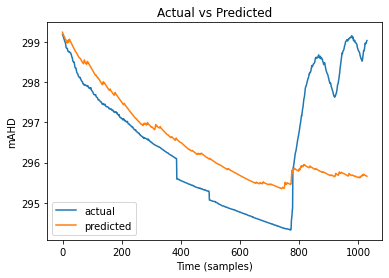

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_rainfall_recursive[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:

in_seq1 = array(m19_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m19_daily_rainfall['BH_mAHD'][:-1])
out_seq = array(m19_daily_rainfall['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

rainfall_seq_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_rainfall_post_2017=np.zeros(Num_Exp)
test_acc_rainfall_post_2017=np.zeros(Num_Exp)
Step_RMSE_rainfall_post_2017=np.zeros([Num_Exp,n_steps_out])

model_rainfall_post_2017 = Sequential()
model_rainfall_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_rainfall_post_2017.add(Dense(n_steps_out))
model_rainfall_post_2017.compile(optimizer='adam', loss='mse')
model_rainfall_post_2017.summary()
Best_RMSE_rainfall_post_2017=1000   #Assigning a large number

outputs_rainfall_post_2017 = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_rainfall_post_2017
    #batch_size=64,
    model_rainfall_post_2017.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_rainfall_post_2017.predict(x_train).flatten()
    y_predicttest = model_rainfall_post_2017.predict(x_test).flatten()
    train_acc_rainfall_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_rainfall_post_2017[run] = rmse( y_predicttest, y_test)
    print("RMSE: ", test_acc_rainfall_post_2017[run])
    outputs_rainfall_post_2017[run,] = y_predicttest
    if test_acc_rainfall_post_2017[run]<Best_RMSE_rainfall_post_2017:
        Best_RMSE_rainfall_post_2017=test_acc_rainfall_post_2017[run]
        Best_Predict_Test_rainfall_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_rainfall_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                520       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE:  0.06887791454493696
Experiment 2 in progress
RMSE:  0.06829572873275748
Experiment 3 in progress
RMSE:  0.06778139930111315
Experiment 4 in progress
RMSE:  0.06716703905128713
Experiment 5 in progress
RMSE:  0.06662255849503021
Experiment 6 in progress
RMSE:  0.06607050625148665
Experiment 7 in progress
RMSE:  0.065575574775659
Experiment 8 in progress
RMSE:  0.06495797334689933
Experiment 9 in progress
RMSE:  0.0644

In [ ]:
fx_high_post_2017 = np.percentile(outputs_rainfall_post_2017, 95, axis=0)
fx_low_post_2017 = np.percentile(outputs_rainfall_post_2017, 5, axis=0)
fx_mid_post_2017 = np.percentile(outputs_rainfall_post_2017, 50, axis=0)
fx_high_recursive = np.percentile(outputs_rainfall_recursive, 95, axis=0)
fx_low_recursive = np.percentile(outputs_rainfall_recursive, 5, axis=0)
fx_mid_recursive = np.percentile(outputs_rainfall_recursive, 50, axis=0)
in_between_percentage_rainfall_recursive = np.count_nonzero(np.less(fx_low_recursive,y_test) & np.greater_equal(fx_high_recursive,y_test) )/len(y_test)
in_between_percentage_rainfall_recursive

0.8571428571428571

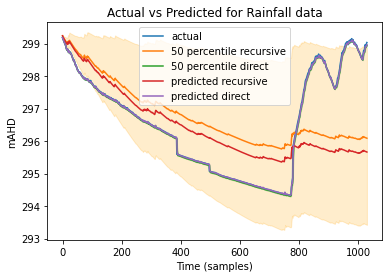

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')
plt.plot(x_data, Best_Predict_Test_rainfall_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_rainfall_post_2017[:], label='predicted direct')
plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_post_2017.png',dpi=300)
plt.show()
plt.close()

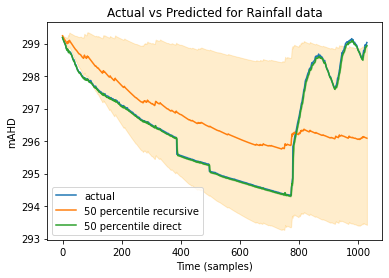

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')

plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_post_2017_50_only.png',dpi=300)
plt.show()
plt.close()

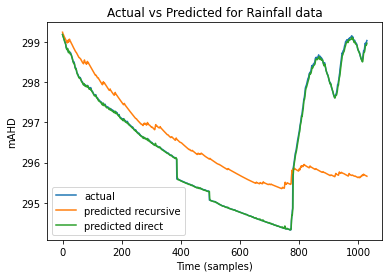

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_rainfall_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_rainfall_post_2017[:], label='predicted direct')

plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_post_2017_best_only.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_19_pre_2017 = m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_19_post_2017 = m19_daily_rainfall[m19_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh19_Best_Predict_Test_post_2017 = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_rainfall_post_2017[:])
bh19_Best_Predict_Test_recursive = np.append(BH_19_pre_2017['BH_mAHD'], Best_Predict_Test_rainfall_recursive[:])
actual = np.append(BH_19_pre_2017['BH_mAHD'], BH_19_post_2017['BH_mAHD'][:-3])

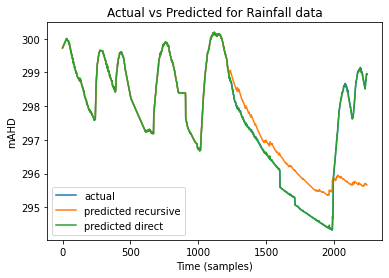

In [ ]:
x_data=np.linspace(0,bh19_Best_Predict_Test_post_2017.shape[0], num=bh19_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh19_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.plot(x_data, bh19_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_rainfall_post_2017

0.05849101936102386

In [ ]:
Best_RMSE_rainfall_recursive

1.4290085991129873

In [ ]:
Best_NSE_rainfall_post_2017 = r2_score(Best_Predict_Test_rainfall_post_2017, y_test[:])
Best_NSE_rainfall_recursive = r2_score(Best_Predict_Test_rainfall_recursive, y_test[:])

In [ ]:
Best_NSE_rainfall_post_2017

0.9985269107565959

In [ ]:
Best_NSE_rainfall_recursive

-0.8739922470036756

In [ ]:
saved_map = {
    'outputs_rainfall_recursive':outputs_rainfall_recursive,
    'model_rainfall_recursive': model_rainfall_recursive,
    'train_acc_rainfall_recursive': train_acc_rainfall_recursive,
    'test_acc_rainfall_recursive': test_acc_rainfall_recursive,
    'Step_RMSE_rainfall_recursive': Step_RMSE_rainfall_recursive,
    'Best_predict_test_rainfall_recursive': Best_Predict_Test_rainfall_recursive,
    'Best_RMSE_rainfall_recursive': Best_RMSE_rainfall_recursive,
    'Best_NSE_rainfall_recursive':Best_NSE_rainfall_recursive,
    #'RMSE_outputs_rainfall_recursive':RMSE_outputs_rainfall_recursive,

    'outputs_rainfall_post_2017':outputs_rainfall_post_2017,
    'model_rainfall_post_2017': model_rainfall_post_2017,
    'train_acc_rainfall_post_2017': train_acc_rainfall_post_2017,
    'test_acc_rainfall_post_2017': test_acc_rainfall_post_2017,
    'Step_RMSE_rainfall_post_2017': Step_RMSE_rainfall_post_2017,
    'Best_predict_test_rainfall_post_2017': Best_Predict_Test_rainfall_post_2017,
    'Best_RMSE_rainfall_post_2017': Best_RMSE_rainfall_post_2017,
    'Best_NSE_rainfall_post_2017':Best_NSE_rainfall_post_2017,
    #'RMSE_outputs_rainfall_post_2017':RMSE_outputs_rainfall_post_2017,
    'in_between_percentage_rainfall_recursive': in_between_percentage_rainfall_recursive,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_19_rainfall_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

### Discretised streamflow

In [ ]:

in_seq1 = array(m18_daily['discretised_flow'][:-1])
in_seq2 = array(m18_daily['mAHD_y'][:-1])
out_seq = array(m18_daily['mAHD_y'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

x_train = X[0:int(len(X)*4/5)]
x_test = X[int(len(X)*4/5):]
y_train = y[0:int(len(y)*4/5)]
y_test = y[int(len(y)*4/5):]
n_features = X.shape[2]
Num_Exp = 10
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_streamflow_discretised_18=np.zeros(Num_Exp)
test_acc_streamflow_discretised_18=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised_18=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised_18 = Sequential()
model_streamflow_discretised_18.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised_18.add(Dense(n_steps_out))
model_streamflow_discretised_18.compile(optimizer='adam', loss='mse')
model_streamflow_discretised_18.summary()
Best_RMSE_streamflow_discretised_18=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised_18
    #batch_size=64,
    model_streamflow_discretised_18.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised_18.predict(x_train).flatten()
    y_predicttest = model_streamflow_discretised_18.predict(x_test).flatten()
    train_acc_streamflow_discretised_18[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised_18[run] = rmse( y_predicttest, y_test)
    if test_acc_streamflow_discretised_18[run]<Best_RMSE_streamflow_discretised_18:
        Best_RMSE_streamflow_discretised_18=test_acc_streamflow_discretised_18[run]
        Best_Predict_Test_streamflow_discretised_18=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised_18[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

#### Post 2017

In [ ]:
in_seq1 = array(m18_daily['discretised_flow'][:-1])
in_seq2 = array(m18_daily['BH_mAHD'][:-1])
out_seq = array(m18_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m18_daily[m18_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m18_daily[m18_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_streamflow_discretised_18_post_2017=np.zeros(Num_Exp)
test_acc_streamflow_discretised_18_post_2017=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised_18_post_2017=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised_18_post_2017 = Sequential()
model_streamflow_discretised_18_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised_18_post_2017.add(Dense(n_steps_out))
model_streamflow_discretised_18_post_2017.compile(optimizer='adam', loss='mse')
model_streamflow_discretised_18_post_2017.summary()
Best_RMSE_streamflow_discretised_18_post_2017=1000   #Assigning a large number

outputs_streamflow_discretised_18_post_2017 = np.ones((Num_Exp, y_test.shape[0]))
RMSE_outputs_streamflow_discretised_18_post_2017 = np.ones((Num_Exp))
start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised_18_post_2017
    #batch_size=64,
    model_streamflow_discretised_18_post_2017.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised_18_post_2017.predict(x_train).flatten()
    y_predicttest = model_streamflow_discretised_18_post_2017.predict(x_test).flatten()
    train_acc_streamflow_discretised_18_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised_18_post_2017[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_streamflow_discretised_18_post_2017[run])
    outputs_streamflow_discretised_18_post_2017[run,] = y_predicttest

    if test_acc_streamflow_discretised_18_post_2017[run]<Best_RMSE_streamflow_discretised_18_post_2017:
        Best_RMSE_streamflow_discretised_18_post_2017=test_acc_streamflow_discretised_18_post_2017[run]
        Best_Predict_Test_streamflow_discretised_18_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised_18_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 10)                520       
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 0.14746028043464962
Experiment 2 in progress
RMSE value: 0.14649956592175672
Experiment 3 in progress
RMSE value: 0.1454774318443546
Experiment 4 in progress
RMSE value: 0.14449992576842866
Experiment 5 in progress
RMSE value: 0.14349769532506365
Experiment 6 in progress
RMSE value: 0.14248961685184974
Experiment 7 in progress
RMSE value: 0.14152744570793782
Experiment 8 in progress
RMSE value: 0.14055120770351

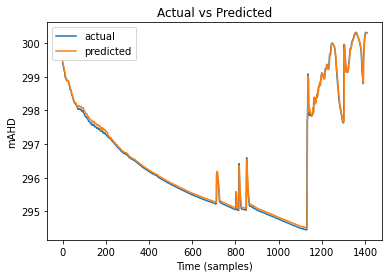

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18_post_2017[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:
saved_map = {
    'outputs_streamflow_discretised_18_post_2017':outputs_streamflow_discretised_18_post_2017,
    'model_streamflow_discretised_18_post_2017': model_streamflow_discretised_18_post_2017,
    'train_acc_streamflow_discretised_18_post_2017': train_acc_streamflow_discretised_18_post_2017,
    'test_acc_streamflow_discretised_18_post_2017': test_acc_streamflow_discretised_18_post_2017,
    'Step_RMSE_streamflow_discretised_18_post_2017': Step_RMSE_streamflow_discretised_18_post_2017,
    'Best_predict_test_streamflow_discretised_18_post_2017': Best_Predict_Test_streamflow_discretised_18_post_2017,
    'Best_RMSE_streamflow_discretised_18_post_2017': Best_RMSE_streamflow_discretised_18_post_2017,
    'Best_NSE_streamflow_discretised_18_post_2017':Best_NSE_streamflow_discretised_18_post_2017,
    'RMSE_outputs_streamflow_discretised_18_post_2017':RMSE_outputs_streamflow_discretised_18_post_2017,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_18_streamflow_discretised_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

In [ ]:
pick_read = open('drive/My Drive/Thesis/Thesis/data_18_streamflow_discretised_post_2017.pickle','rb')
data18 = pickle.load(pick_read)
pick_read.close()

outputs_streamflow_discretised_18_post_2017 = data18['outputs_streamflow_discretised_18_post_2017']
model_streamflow_discretised_18_post_2017 = data18['model_streamflow_discretised_18_post_2017'],
train_acc_streamflow_discretised_18_post_2017 = data18['train_acc_streamflow_discretised_18_post_2017'],
test_acc_streamflow_discretised_18_post_2017 = data18['test_acc_streamflow_discretised_18_post_2017'],
Step_RMSE_streamflow_discretised_18_post_2017 = data18['Step_RMSE_streamflow_discretised_18_post_2017'],
Best_Predict_Test_streamflow_discretised_18_post_2017 = data18['Best_predict_test_streamflow_discretised_18_post_2017'],
Best_RMSE_streamflow_discretised_18_post_2017 = data18['Best_RMSE_streamflow_discretised_18_post_2017'],
Best_NSE_streamflow_discretised_18_post_2017 = data18['Best_NSE_streamflow_discretised_18_post_2017']
#RMSE_outputs_streamflow_discretised_18_post_2017 = data18['RMSE_outputs_streamflow_discretised_18_post_2017']

In [ ]:
in_seq1 = array(m18_daily['discretised_flow'][:-1])
in_seq2 = array(m18_daily['BH_mAHD'][:-1])
out_seq = array(m18_daily['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m18_daily[m18_daily['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m18_daily[m18_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_discretised_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_streamflow_discretised_18_recursive=np.zeros(Num_Exp)
test_acc_streamflow_discretised_18_recursive=np.zeros(Num_Exp)
Step_RMSE_streamflow_discretised_18_recursive=np.zeros([Num_Exp,n_steps_out])

model_streamflow_discretised_18_recursive = Sequential()
model_streamflow_discretised_18_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_streamflow_discretised_18_recursive.add(Dense(n_steps_out))
model_streamflow_discretised_18_recursive.compile(optimizer='adam', loss='mse')
model_streamflow_discretised_18_recursive.summary()
Best_RMSE_streamflow_discretised_18_recursive=1000   #Assigning a large number


outputs_streamflow_discretised_18_recursive = np.ones((Num_Exp, y_test.shape[0]))
start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_streamflow_discretised_18_recursive
    #batch_size=64,
    model_streamflow_discretised_18_recursive.fit(x_train, y_train, epochs=Epochs, batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_streamflow_discretised_18_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively(model_streamflow_discretised_18_recursive, x_test_extra_samples[0][:,1], streamflow_discretised_post_2017,num_post_2017-3, 3)
    train_acc_streamflow_discretised_18_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_streamflow_discretised_18_recursive[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_streamflow_discretised_18_recursive[run])
    outputs_streamflow_discretised_18_recursive[run,] = y_predicttest
    if test_acc_streamflow_discretised_18_recursive[run]<Best_RMSE_streamflow_discretised_18_recursive:
        Best_RMSE_streamflow_discretised_18_recursive=test_acc_streamflow_discretised_18_recursive[run]
        Best_Predict_Test_streamflow_discretised_18_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_streamflow_discretised_18_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                520       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 13.119479716296185
Experiment 2 in progress
RMSE value: 12.470711130655609
Experiment 3 in progress
RMSE value: 11.894815761757119
Experiment 4 in progress
RMSE value: 11.378263969029021
Experiment 5 in progress
RMSE value: 10.921977182213176
Experiment 6 in progress
RMSE value: 10.509334087023277
Experiment 7 in progress
RMSE value: 10.111916204579162
Experiment 8 in progress
RMSE value: 9.77746405150998
Exper

In [ ]:
fx_high_post_2017 = np.percentile(outputs_streamflow_discretised_18_post_2017, 95, axis=0)
fx_low_post_2017 = np.percentile(outputs_streamflow_discretised_18_post_2017, 5, axis=0)
fx_mid_post_2017 = np.percentile(outputs_streamflow_discretised_18_post_2017, 50, axis=0)
fx_high_recursive = np.percentile(outputs_streamflow_discretised_18_recursive, 95, axis=0)
fx_low_recursive = np.percentile(outputs_streamflow_discretised_18_recursive, 5, axis=0)
fx_mid_recursive = np.percentile(outputs_streamflow_discretised_18_recursive, 50, axis=0)
in_between_percentage_streamflow_discretised_18_recursive = np.count_nonzero(np.less(fx_low_recursive,y_test) & np.greater_equal(fx_high_recursive,y_test) )/len(y_test)
in_between_percentage_streamflow_discretised_18_recursive

0.0

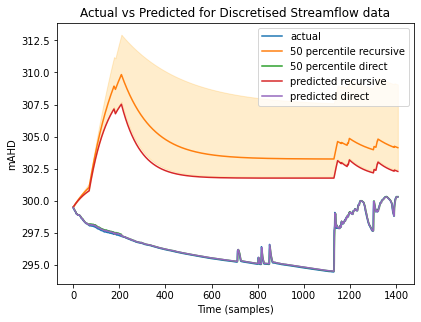

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18_post_2017[:], label='predicted direct')
plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_18_post_2017_1.png',dpi=300)
plt.show()
plt.close()

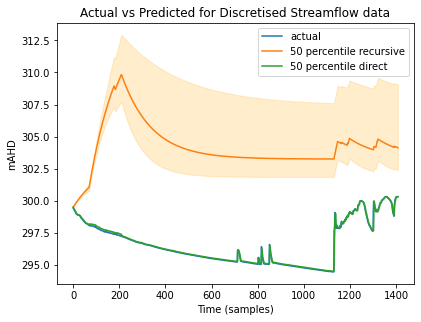

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')

plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised Streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_18_post_2017_50_only_1.png',dpi=300)
plt.show()
plt.close()

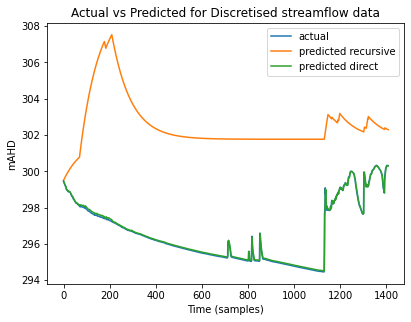

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_streamflow_discretised_18_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_18_post_2017_best_only_1.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_18_pre_2017 = m18_daily[m18_daily['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_18_post_2017 = m18_daily[m18_daily['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh18_Best_Predict_Test_post_2017 = np.append(BH_18_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_discretised_18_post_2017[:])
bh18_Best_Predict_Test_recursive = np.append(BH_18_pre_2017['BH_mAHD'], Best_Predict_Test_streamflow_discretised_18_recursive[:])
actual = np.append(BH_18_pre_2017['BH_mAHD'], BH_18_post_2017['BH_mAHD'][:-3])

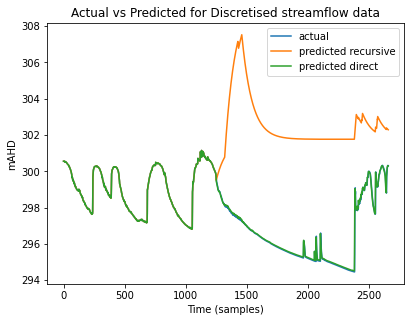

In [ ]:
x_data=np.linspace(0,bh18_Best_Predict_Test_post_2017.shape[0], num=bh18_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh18_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.plot(x_data, bh18_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Discretised streamflow data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Streamflow_discretised_18_1.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_streamflow_discretised_18_recursive

6.231609877960011

In [ ]:
Best_RMSE_streamflow_discretised_18_post_2017

(0.12129029236702073,)

In [ ]:
Best_NSE_streamflow_discretised_18_post_2017 = r2_score(Best_Predict_Test_streamflow_discretised_18_post_2017, y_test[:])
Best_NSE_streamflow_discretised_18_recursive = r2_score(Best_Predict_Test_streamflow_discretised_18_recursive, y_test[:])

In [ ]:
Best_NSE_streamflow_discretised_18_post_2017

0.994686197509795

In [ ]:
Best_NSE_streamflow_discretised_18_recursive

-16.58282578964768

In [ ]:
saved_map = {
    'outputs_streamflow_discretised_18_recursive':outputs_streamflow_discretised_18_recursive,
    'model_streamflow_discretised_18_recursive': model_streamflow_discretised_18_recursive,
    'train_acc_streamflow_discretised_18_recursive': train_acc_streamflow_discretised_18_recursive,
    'test_acc_streamflow_discretised_18_recursive': test_acc_streamflow_discretised_18_recursive,
    'Step_RMSE_streamflow_discretised_18_recursive': Step_RMSE_streamflow_discretised_18_recursive,
    'Best_predict_test_streamflow_discretised_18_recursive': Best_Predict_Test_streamflow_discretised_18_recursive,
    'Best_RMSE_streamflow_discretised_18_recursive': Best_RMSE_streamflow_discretised_18_recursive,
    'Best_NSE_streamflow_discretised_18_recursive':Best_NSE_streamflow_discretised_18_recursive,

    'outputs_streamflow_discretised_18_post_2017':outputs_streamflow_discretised_18_post_2017,
    'model_streamflow_discretised_18_post_2017': model_streamflow_discretised_18_post_2017,
    'train_acc_streamflow_discretised_18_post_2017': train_acc_streamflow_discretised_18_post_2017,
    'test_acc_streamflow_discretised_18_post_2017': test_acc_streamflow_discretised_18_post_2017,
    'Step_RMSE_streamflow_discretised_18_post_2017': Step_RMSE_streamflow_discretised_18_post_2017,
    'Best_predict_test_streamflow_discretised_18_post_2017': Best_Predict_Test_streamflow_discretised_18_post_2017,
    'Best_RMSE_streamflow_discretised_18_post_2017': Best_RMSE_streamflow_discretised_18_post_2017,
    'Best_NSE_streamflow_discretised_18_post_2017':Best_NSE_streamflow_discretised_18_post_2017,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_18_streamflow_discretised_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

### Rainfall

In [ ]:

in_seq1 = array(m18_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m18_daily_rainfall['mAHD'][:-1])
out_seq = array(m18_daily_rainfall['mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

x_train = X[0:int(len(X)*4/5)]
x_test = X[int(len(X)*4/5):]
y_train = y[0:int(len(y)*4/5)]
y_test = y[int(len(y)*4/5):]
n_features = X.shape[2]
Num_Exp = 10
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_18=np.zeros(Num_Exp)
test_acc_18=np.zeros(Num_Exp)
Step_RMSE_18=np.zeros([Num_Exp,n_steps_out])

model_18 = Sequential()
model_18.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_18.add(Dense(n_steps_out))
model_18.compile(optimizer='adam', loss='mse')
model_18.summary()
Best_RMSE=1000   #Assigning a large number

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_18
    #batch_size=64,
    model_18.fit(x_train, y_train, epochs=Epochs, verbose=0, shuffle=False)
    y_predicttrain = model_18.predict(x_train).flatten()
    y_predicttest = model_18.predict(x_test).flatten()
    train_acc_18[run] = rmse( y_predicttrain,y_train)
    test_acc_18[run] = rmse( y_predicttest, y_test)
    if test_acc_18[run]<Best_RMSE_18:
        Best_RMSE_18=test_acc_18[run]
        Best_Predict_Test_18=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_18[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_18[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

#### Post 2017

In [ ]:

in_seq1 = array(m18_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m18_daily_rainfall['BH_mAHD'][:-1])
out_seq = array(m18_daily_rainfall['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

streamflow_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000



train_acc_rainfall_18_post_2017=np.zeros(Num_Exp)
test_acc_rainfall_18_post_2017=np.zeros(Num_Exp)
Step_RMSE_rainfall_18_post_2017=np.zeros([Num_Exp,n_steps_out])

model_rainfall_18_post_2017 = Sequential()
model_rainfall_18_post_2017.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_rainfall_18_post_2017.add(Dense(n_steps_out))
model_rainfall_18_post_2017.compile(optimizer='adam', loss='mse')
model_rainfall_18_post_2017.summary()
Best_RMSE_rainfall_18_post_2017=1000   #Assigning a large number


outputs_rainfall_18_post_2017 = np.ones((Num_Exp, y_test.shape[0]))

start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_rainfall_18_post_2017
    #batch_size=64,
    model_rainfall_18_post_2017.fit(x_train, y_train, epochs=Epochs,batch_size=16, verbose=0, shuffle=False)
    y_predicttrain = model_rainfall_18_post_2017.predict(x_train).flatten()
    y_predicttest = model_rainfall_18_post_2017.predict(x_test).flatten()
    train_acc_rainfall_18_post_2017[run] = rmse( y_predicttrain,y_train)
    test_acc_rainfall_18_post_2017[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_rainfall_18_post_2017[run])
    outputs_rainfall_18_post_2017[run,] = y_predicttest
    if test_acc_rainfall_18_post_2017[run]<Best_RMSE_rainfall_18_post_2017:
        Best_RMSE_rainfall_18_post_2017=test_acc_rainfall_18_post_2017[run]
        Best_Predict_Test_rainfall_18_post_2017=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_rainfall_18_post_2017[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                520       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
Experiment 1 in progress
RMSE value: 0.21379754256605926
Experiment 2 in progress
RMSE value: 0.21381070288292622
Experiment 3 in progress
RMSE value: 0.21378823122873417
Experiment 4 in progress
RMSE value: 0.21355051326923064
Experiment 5 in progress
RMSE value: 0.21334171321330744
Experiment 6 in progress
RMSE value: 0.2130177046932552
Experiment 7 in progress
RMSE value: 0.21262773055000753
Experiment 8 in progress
RMSE value: 0.2121256322291289


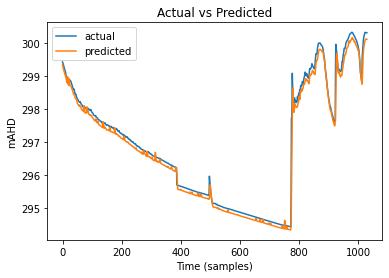

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_rainfall_18_post_2017[:], label='predicted')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted')
plt.legend()
#plt.savefig(name+"_"+Mname+'pred_Step'+'.png',dpi=300)
plt.show()
plt.close()

In [ ]:

in_seq1 = array(m18_daily_rainfall['Rainfall'][:-1])
in_seq2 = array(m18_daily_rainfall['BH_mAHD'][:-1])
out_seq = array(m18_daily_rainfall['BH_mAHD'][1:])
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

num_pre_2017 = len(m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)])
num_post_2017 = len(m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)])
x_train = X[0:num_pre_2017]
x_test = X[num_pre_2017:]
x_train_extra_samples = X[0:num_pre_2017]
x_test_extra_samples = X[num_pre_2017:]
y_train = y[0:num_pre_2017]
y_test = y[num_pre_2017:]
n_features = X.shape[2]

rainfall_recursive_post_2017 = in_seq1[num_pre_2017:]
Num_Exp = 30
n_steps_out = 1
Hidden=10
Epochs=1000


train_acc_rainfall_18_recursive=np.zeros(Num_Exp)
test_acc_rainfall_18_recursive=np.zeros(Num_Exp)
Step_RMSE_rainfall_18_recursive=np.zeros([Num_Exp,n_steps_out])

model_rainfall_18_recursive = Sequential()
model_rainfall_18_recursive.add(LSTM(Hidden, activation='relu', input_shape=(n_steps,n_features)))
model_rainfall_18_recursive.add(Dense(n_steps_out))
model_rainfall_18_recursive.compile(optimizer='adam', loss='mse')
model_rainfall_18_recursive.summary()
Best_RMSE_rainfall_18_recursive=1000   #Assigning a large number

outputs_rainfall_18_recursive = np.ones((Num_Exp, y_test.shape[0]))


start_time=time.time()
for run in range(Num_Exp):
    print("Experiment",run+1,"in progress")
    # fit model_rainfall_18_recursive
    #batch_size=64,
    model_rainfall_18_recursive.fit(x_train, y_train, epochs=Epochs, verbose=0,batch_size=16, shuffle=False)
    y_predicttrain = model_rainfall_18_recursive.predict(x_train).flatten()
    y_predicttest = predict_recursively(model_rainfall_18_recursive, x_test_extra_samples[0][:,1], rainfall_recursive_post_2017,num_post_2017-3, 3)
    train_acc_rainfall_18_recursive[run] = rmse( y_predicttrain,y_train)
    test_acc_rainfall_18_recursive[run] = rmse( y_predicttest, y_test)
    print("RMSE value:", test_acc_rainfall_18_recursive[run])
    outputs_rainfall_18_recursive[run,] = y_predicttest
    if test_acc_rainfall_18_recursive[run]<Best_RMSE_rainfall_18_recursive:
        Best_RMSE_rainfall_18_recursive=test_acc_rainfall_18_recursive[run]
        Best_Predict_Test_rainfall_18_recursive=y_predicttest
    for j in range(n_steps_out):
      Step_RMSE_rainfall_18_recursive[run]=rmse(y_predicttest[:], y_test[:])
print("Total time for",Num_Exp,"experiments",time.time()-start_time)


NameError: ignored

In [ ]:
fx_high_post_2017 = np.percentile(outputs_rainfall_18_post_2017, 95, axis=0)
fx_low_post_2017 = np.percentile(outputs_rainfall_18_post_2017, 5, axis=0)
fx_mid_post_2017 = np.percentile(outputs_rainfall_18_post_2017, 50, axis=0)
fx_high_recursive = np.percentile(outputs_rainfall_18_recursive, 95, axis=0)
fx_low_recursive = np.percentile(outputs_rainfall_18_recursive, 5, axis=0)
fx_mid_recursive = np.percentile(outputs_rainfall_18_recursive, 50, axis=0)
in_between_percentage_rainfall_18_recursive = np.count_nonzero(np.less(fx_low_recursive,y_test) & np.greater_equal(fx_high_recursive,y_test) )/len(y_test)
in_between_percentage_rainfall_18_recursive

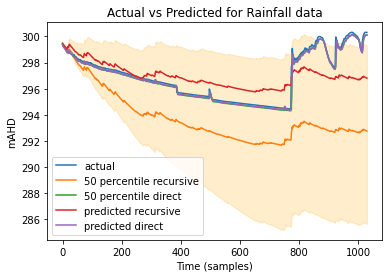

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')
plt.plot(x_data, Best_Predict_Test_rainfall_18_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_rainfall_18_post_2017[:], label='predicted direct')
plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/rainfall_18_post_2017.png',dpi=300)
plt.show()
plt.close()

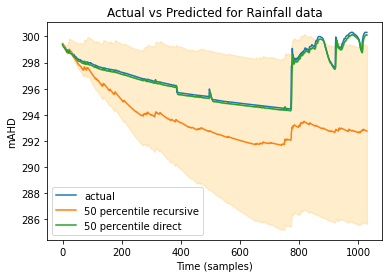

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, fx_mid_recursive[:], label='50 percentile recursive')
plt.plot(x_data, fx_mid_post_2017[:], label='50 percentile direct')

plt.fill_between(x_data, fx_low_recursive, fx_high_recursive, color='orange', alpha=0.2)
plt.fill_between(x_data, fx_low_post_2017, fx_high_post_2017, color='green', alpha=0.2)
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_18_post_2017_50_only.png',dpi=300)
plt.show()
plt.close()

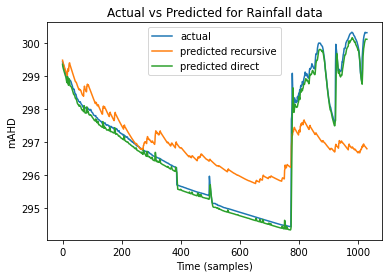

In [ ]:
x_data=np.linspace(0,y_test.shape[0], num=y_test.shape[0])
plt.figure()
plt.plot(x_data, y_test[:], label='actual')
plt.plot(x_data, Best_Predict_Test_rainfall_18_recursive[:], label='predicted recursive')
plt.plot(x_data, Best_Predict_Test_rainfall_18_post_2017[:], label='predicted direct')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_18_post_2017.png',dpi=300)
plt.show()
plt.close()

In [ ]:
BH_18_pre_2017 = m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date<datetime.date(2017,1,1)]
BH_18_post_2017 = m18_daily_rainfall[m18_daily_rainfall['Date and Time'].dt.date>=datetime.date(2017,1,1)]

In [ ]:
bh18_Best_Predict_Test_post_2017 = np.append(BH_18_pre_2017['BH_mAHD'], Best_Predict_Test_rainfall_18_post_2017[:])
bh18_Best_Predict_Test_recursive = np.append(BH_18_pre_2017['BH_mAHD'], Best_Predict_Test_rainfall_18_recursive[:])
actual = np.append(BH_18_pre_2017['BH_mAHD'], BH_18_post_2017['BH_mAHD'][:-3])

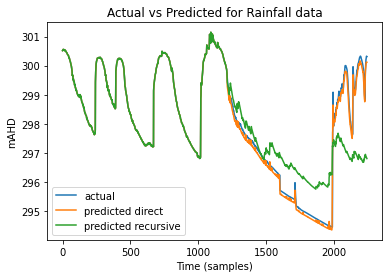

In [ ]:
x_data=np.linspace(0,bh18_Best_Predict_Test_post_2017.shape[0], num=bh18_Best_Predict_Test_post_2017.shape[0])
plt.figure()
plt.plot(x_data, actual, label='actual')
plt.plot(x_data, bh18_Best_Predict_Test_post_2017[:], label='predicted direct')
plt.plot(x_data, bh18_Best_Predict_Test_recursive[:], label='predicted recursive')
plt.ylabel('mAHD')
plt.xlabel('Time (samples)')
plt.title('Actual vs Predicted for Rainfall data')
plt.legend()
plt.savefig('drive/My Drive/Thesis/Thesis/Image files/Rainfall_18.png',dpi=300)
plt.show()
plt.close()

In [ ]:
Best_RMSE_rainfall_18_recursive

1.4230272290665968

In [ ]:
Best_RMSE_rainfall_18_post_2017

0.1915571915401052

In [ ]:
Best_NSE_rainfall_18_post_2017 = r2_score(Best_Predict_Test_rainfall_18_post_2017, y_test[:])
Best_NSE_rainfall_18_recursive = r2_score(Best_Predict_Test_rainfall_18_recursive, y_test[:])

In [ ]:
Best_NSE_rainfall_18_post_2017

0.9883590204083531

In [ ]:
Best_NSE_rainfall_18_recursive

-1.7424946777884283

In [ ]:
saved_map = {
    'outputs_rainfall_18_recursive':outputs_rainfall_18_recursive,
    'model_rainfall_18_recursive': model_rainfall_18_recursive,
    'train_acc_rainfall_18_recursive': train_acc_rainfall_18_recursive,
    'test_acc_rainfall_18_recursive': test_acc_rainfall_18_recursive,
    'Step_RMSE_rainfall_18_recursive': Step_RMSE_rainfall_18_recursive,
    'Best_predict_test_rainfall_18_recursive': Best_Predict_Test_rainfall_18_recursive,
    'Best_RMSE_rainfall_18_recursive': Best_RMSE_rainfall_18_recursive,
    'Best_NSE_rainfall_18_recursive':Best_NSE_rainfall_18_recursive,

    'outputs_rainfall_18_post_2017':outputs_rainfall_18_post_2017,
    'model_rainfall_18_post_2017': model_rainfall_18_post_2017,
    'train_acc_rainfall_18_post_2017': train_acc_rainfall_18_post_2017,
    'test_acc_rainfall_18_post_2017': test_acc_rainfall_18_post_2017,
    'Step_RMSE_rainfall_18_post_2017': Step_RMSE_rainfall_18_post_2017,
    'Best_predict_test_rainfall_18_post_2017': Best_Predict_Test_rainfall_18_post_2017,
    'Best_RMSE_rainfall_18_post_2017': Best_RMSE_rainfall_18_post_2017,
    'Best_NSE_rainfall_18_post_2017':Best_NSE_rainfall_18_post_2017,
    'in_between_percentage_rainfall_18_recursive': in_between_percentage_rainfall_18_recursive,
}

pick_insert = open('drive/My Drive/Thesis/Thesis/data_18_rainfall_post_2017.pickle','wb')
pickle.dump(saved_map, pick_insert)
pick_insert.close()

In [ ]:
# saved_map_recursive = {

#     'model_streamflow_18_recursive': model_streamflow_18_recursive,
#     'train_acc_streamflow_18_recursive': train_acc_streamflow_18_recursive,
#     'test_acc_streamflow_18_recursive': test_acc_streamflow_18_recursive,
#     'Step_RMSE_streamflow_18_recursive': Step_RMSE_streamflow_18_recursive,
#     'Best_predict_test_streamflow_18_recursive': Best_Predict_Test_streamflow_18_recursive,
#     'Best_RMSE_streamflow_18_recursive': Best_RMSE_streamflow_18_recursive,
#     'Best_NSE_streamflow_recursive':Best_NSE_streamflow_recursive,
#     'model_streamflow_18_post_2017': model_streamflow_18_post_2017,
#     'train_acc_streamflow_18_post_2017': train_acc_streamflow_18_post_2017,
#     'test_acc_streamflow_18_post_2017': test_acc_streamflow_18_post_2017,
#     'Step_RMSE_streamflow_18_post_2017': Step_RMSE_streamflow_18_post_2017,
#     'Best_predict_test_streamflow_18_post_2017': Best_Predict_Test_streamflow_18_post_2017,
#     'Best_RMSE_streamflow_18_post_2017': Best_RMSE_streamflow_18_post_2017,
#     'Best_NSE_streamflow_post_2017':Best_NSE_streamflow_post_2017,

#     'model_streamflow_discretised_18_recursive': model_streamflow_discretised_18_recursive,
#     'train_acc_streamflow_discretised_18_recursive': train_acc_streamflow_discretised_18_recursive,
#     'test_acc_streamflow_discretised_18_recursive': test_acc_streamflow_discretised_18_recursive,
#     'Step_RMSE_streamflow_discretised_18_recursive': Step_RMSE_streamflow_discretised_18_recursive,
#     'Best_predict_test_streamflow_discretised_18_recursive': Best_Predict_Test_streamflow_discretised_18_recursive,
#     'Best_RMSE_streamflow_discretised_18_recursive': Best_RMSE_streamflow_discretised_18_recursive,
#     'Best_NSE_streamflow_discretised_recursive':Best_NSE_streamflow_discretised_recursive,
#     'model_streamflow_discretised_18_post_2017': model_streamflow_discretised_18_post_2017,
#     'train_acc_streamflow_discretised_18_post_2017': train_acc_streamflow_discretised_18_post_2017,
#     'test_acc_streamflow_discretised_18_post_2017': test_acc_streamflow_discretised_18_post_2017,
#     'Step_RMSE_streamflow_discretised_18_post_2017': Step_RMSE_streamflow_discretised_18_post_2017,
#     'Best_predict_test_streamflow_discretised_18_post_2017': Best_Predict_Test_streamflow_discretised_18_post_2017,
#     'Best_RMSE_streamflow_discretised_18_post_2017': Best_RMSE_streamflow_discretised_18_post_2017,
#     'Best_NSE_streamflow_discretised_post_2017':Best_NSE_streamflow_discretised_post_2017,

#     'model_18_recursive': model_18_recursive,
#     'train_acc_18_recursive': train_acc_18_recursive,
#     'test_acc_18_recursive': test_acc_18_recursive,
#     'Step_RMSE_18_recursive': Step_RMSE_18_recursive,
#     'Best_predict_test_18_recursive': Best_Predict_Test_18_recursive,
#     'Best_RMSE_18_recursive': Best_RMSE_18_recursive,
#     'Best_NSE_rainfall_recursive':Best_NSE_rainfall_recursive,
#     'model_18_post_2017': model_18_post_2017,
#     'train_acc_18_post_2017': train_acc_18_post_2017,
#     'test_acc_18_post_2017': test_acc_18_post_2017,
#     'Step_RMSE_18_post_2017': Step_RMSE_18_post_2017,
#     'Best_predict_test_18_post_2017': Best_Predict_Test_18_post_2017,
#     'Best_RMSE_18_post_2017': Best_RMSE_18_post_2017,
#     'Best_NSE_rainfall_post_2017':Best_NSE_rainfall_post_2017,
# }

# # Save the python variable 'saved_map_recursive' to a Drive file named 'variables.pickle'.
# #
# # Because it's stored in Drive, this file will persist even if the VM times out.

# pick_insert = open('drive/My Drive/Thesis/Thesis/data_18_post_2017.pickle','wb')
# pickle.dump(saved_map_recursive, pick_insert)
# pick_insert.close()

### Streamflow